In [3]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import kagglehub
import os
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

# **Distribution of Work**

*   Kevin Mallinger (01147620): RQ1, RQ4
*   Manuel Kisser (12024009): Data extraction for RQ3 und RQ4
*   Maiia Kuzmishyna (12123663): RQ2
*   Elias Hirsch (12341086): RQ3



# **Research Question 1**

**What is the influence of Airbnbs on the local housing markets in London?**

To answer the research question, we investigate how the housing market and airbnb market are influencing each other based on the prices over the years in London. As the question highlights the local aspect, we investigate this question on the city and district level. For this two datasets have been found that display the housing and airbnb prices between 2010 and 2024.The initial hypothesis is, that changes in short-term rental markets can impact housing markets over time. To answer this question, I used the Airbnb data from insideairbnb.com, the housing dataset from Kaggle (https://www.kaggle.com/datasets/justinas/housing-in-london). The respective datasets did not have any missing data, only 0 values for respective categories that were still relevant.


The necessary airbnb_dataframe_processed dataset for RQ1 must be loaded from the following google drive repository and copied into the local data folder: https://drive.google.com/file/d/1EZeh0VeJZ3ONZKhFbPkJJQT4nNAAbQRZ/view?usp=sharing

Loading Data AirBnB

In [4]:
# Define the correct path for the Airbnb data in Google Colab
folder_path_airbnb = os.path.join("data", "airbnb_london")
airbnb_csv_path = os.path.join(folder_path_airbnb, "airbnb_dataframe_processed.csv")

# Check if the file exists
if os.path.exists(airbnb_csv_path):
    merged_df = pd.read_csv(airbnb_csv_path)
    print(f"Airbnb dataframe loaded from {airbnb_csv_path}")
else:
    raise FileNotFoundError(f"File not found: {airbnb_csv_path}")



Airbnb dataframe loaded from data/airbnb_london/airbnb_dataframe_processed.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912052 entries, 0 to 1912051
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   year           int64  
 1   neighbourhood  object 
 2   price          float64
dtypes: float64(1), int64(1), object(1)
memory usage: 43.8+ MB
None
   year neighbourhood  price
0  2010     Islington   59.0
1  2011     Islington   59.0
2  2011     Islington   59.0
3  2011     Islington   59.0
4  2011     Islington   59.0
This is the grouped dataframe per year:  year
2009    120.000000
2010     81.352941
2011    100.631912
2012    112.311783
2013    119.588841
2014    130.981828
2015    130.652194
2016    151.166105
2017    147.373966
2018    136.256877
2019    142.090555
2020    143.248404
2021    151.062242
2022    140.840232
2023    140.832249
2024    151.008841
Name: price, dtype: float64


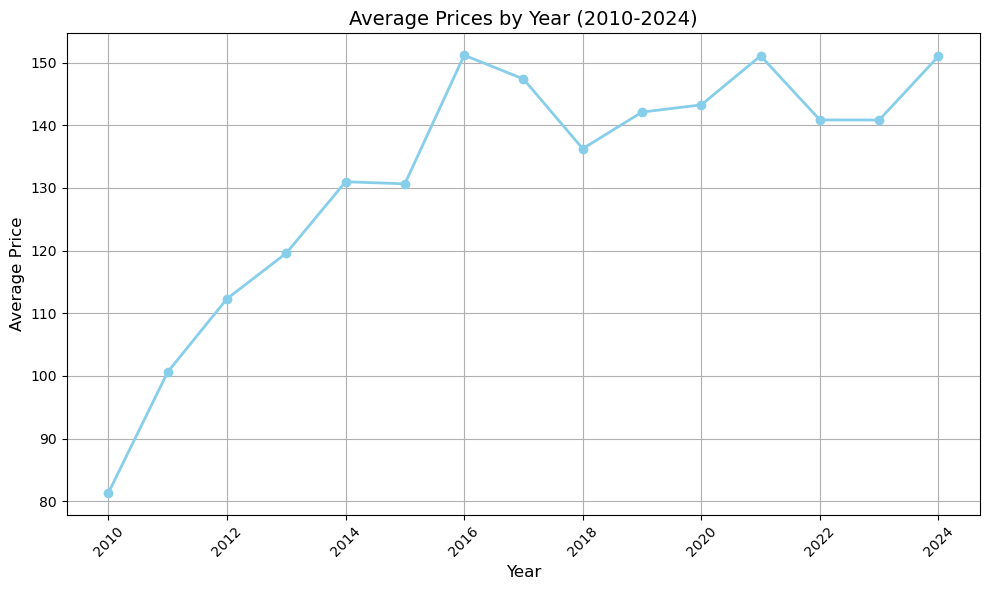

year  neighbourhood         
2009  Kensington and Chelsea    120.000000
2010  Barnet                     65.000000
      Camden                     59.000000
      Hackney                          NaN
      Hammersmith and Fulham     87.363636
                                   ...    
2024  Sutton                     80.594982
      Tower Hamlets             126.081820
      Waltham Forest             97.494204
      Wandsworth                137.683549
      Westminster               223.344982
Name: price, Length: 457, dtype: float64


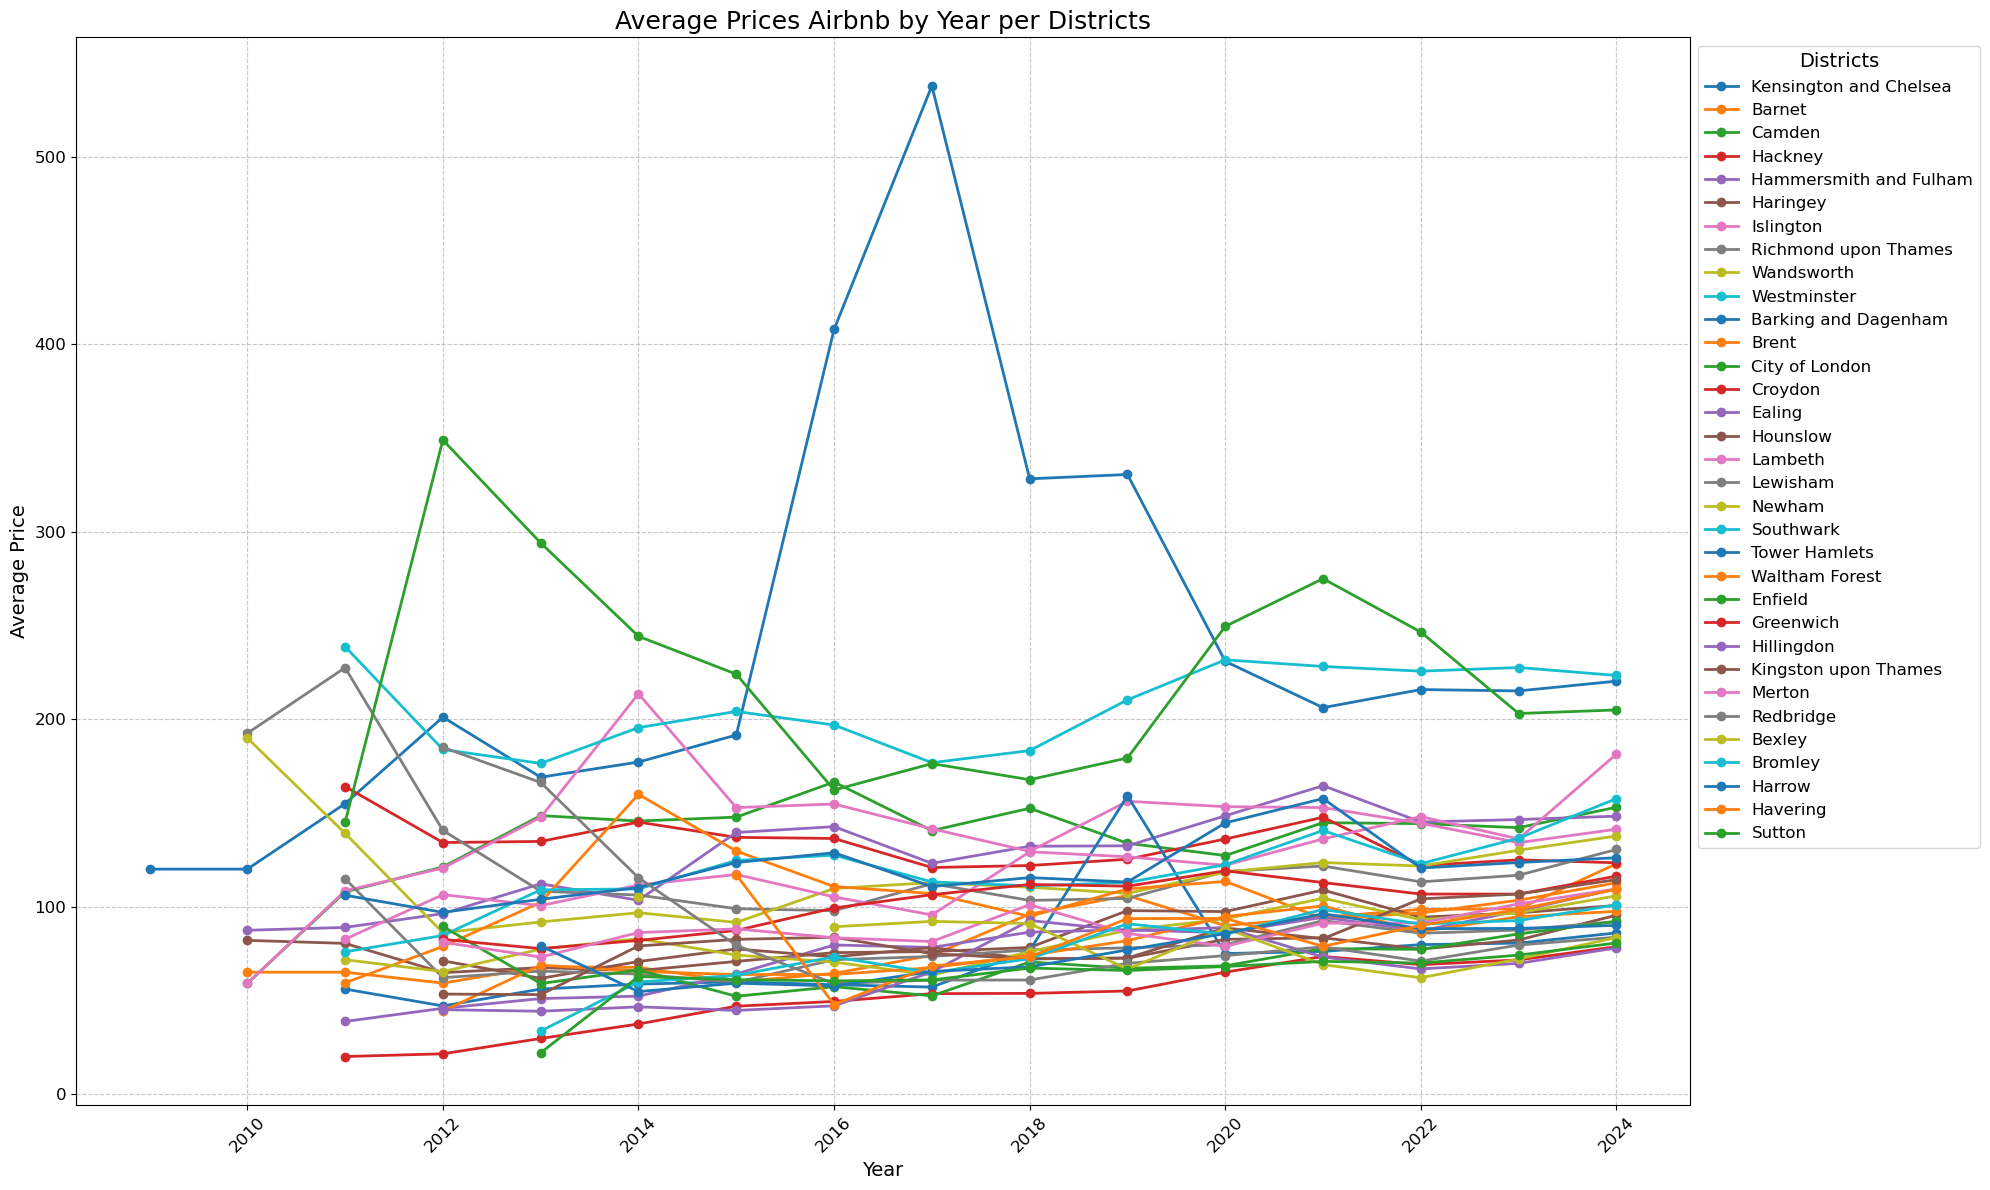

In [5]:
#### checking if prices of Airbnbs change over the years #####
grouped_df = merged_df.groupby(["year"])["price"].mean()
grouped_df_districts = merged_df.groupby(["year", "neighbourhood"])["price"].mean()
print(merged_df[['year', 'neighbourhood', 'price']].info())
print(merged_df[['year', 'neighbourhood', 'price']].head())
print("This is the grouped dataframe per year: ", grouped_df)

#### plotting the price changes over the years
# Filter years between 2010 and 2024
grouped_df_filtered = grouped_df[(grouped_df.index >= 2010) & (grouped_df.index <= 2024)]

plt.figure(figsize=(10, 6))
plt.plot(grouped_df_filtered.index, grouped_df_filtered.values, marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title("Average Prices by Year (2010-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(grouped_df_districts)
plt.figure(figsize=(20, 12))
for district in grouped_df_districts.index.get_level_values('neighbourhood').unique():
    district_data = grouped_df_districts.xs(district, level='neighbourhood')
    plt.plot(district_data.index, district_data.values, marker='o', linestyle='-', linewidth=2, label=district)

plt.title("Average Prices Airbnb by Year per Districts", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.legend(title="Districts", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=45)  # Rotated x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The line plots showed me that the overall trend is an increase in the airbnb prices, but this trend is changing depending on the investigated district. Some district experienced high price fluctuations while others increase in a slow and steady way.
Next, I investigate the housing prices.

loading housing data

In [6]:
# Define the correct path for the housing data in Google Colab
folder_path_housing = os.path.join("data", "housing_london")
housing_csv_path = os.path.join(folder_path_housing, "housing_dataframe_processed.csv")

# Load the processed housing data
if os.path.exists(housing_csv_path):
    housing_df_monthly = pd.read_csv(housing_csv_path)
    print(f"Housing dataframe loaded from {housing_csv_path}")
else:
    raise FileNotFoundError(f"File not found: {housing_csv_path}")


Housing dataframe loaded from data/housing_london/housing_dataframe_processed.csv


year
1995     75880.235185
1996     78875.274908
1997     89618.350000
1998    101747.073801
1999    114256.172222
2000    139979.442593
2001    156932.355556
2002    182190.731481
2003    205099.553704
2004    224604.720370
2005    233314.512963
2006    249303.109259
2007    285944.279630
2008    287478.972222
2009    259296.896296
2010    287559.164815
2011    294819.138889
2012    309409.501852
2013    334589.564815
2014    388208.392593
2015    421356.100000
2016    454884.461111
2017    469978.938889
2018    467240.674074
2019    460056.659259
2020    463329.977778
Name: average_price, dtype: float64


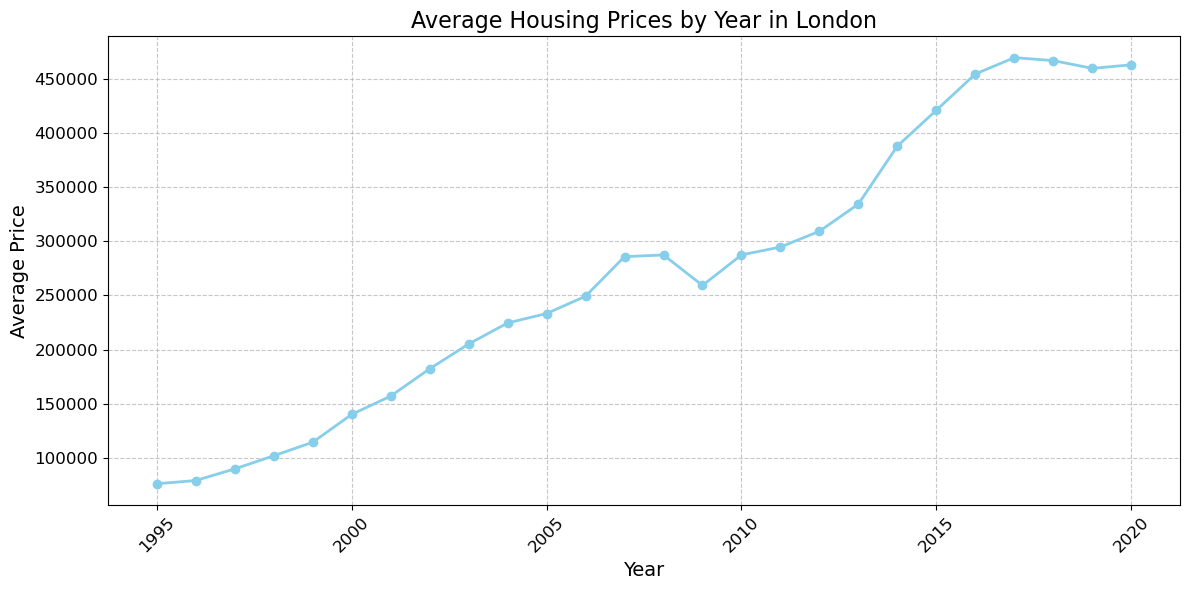

In [7]:
#### total London
housing_merged = housing_df_monthly.groupby(["year"])["average_price"].mean()

print(housing_merged)

plt.figure(figsize=(12, 6))
plt.plot(housing_merged.index, housing_merged.values, marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title("Average Housing Prices by Year in London", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

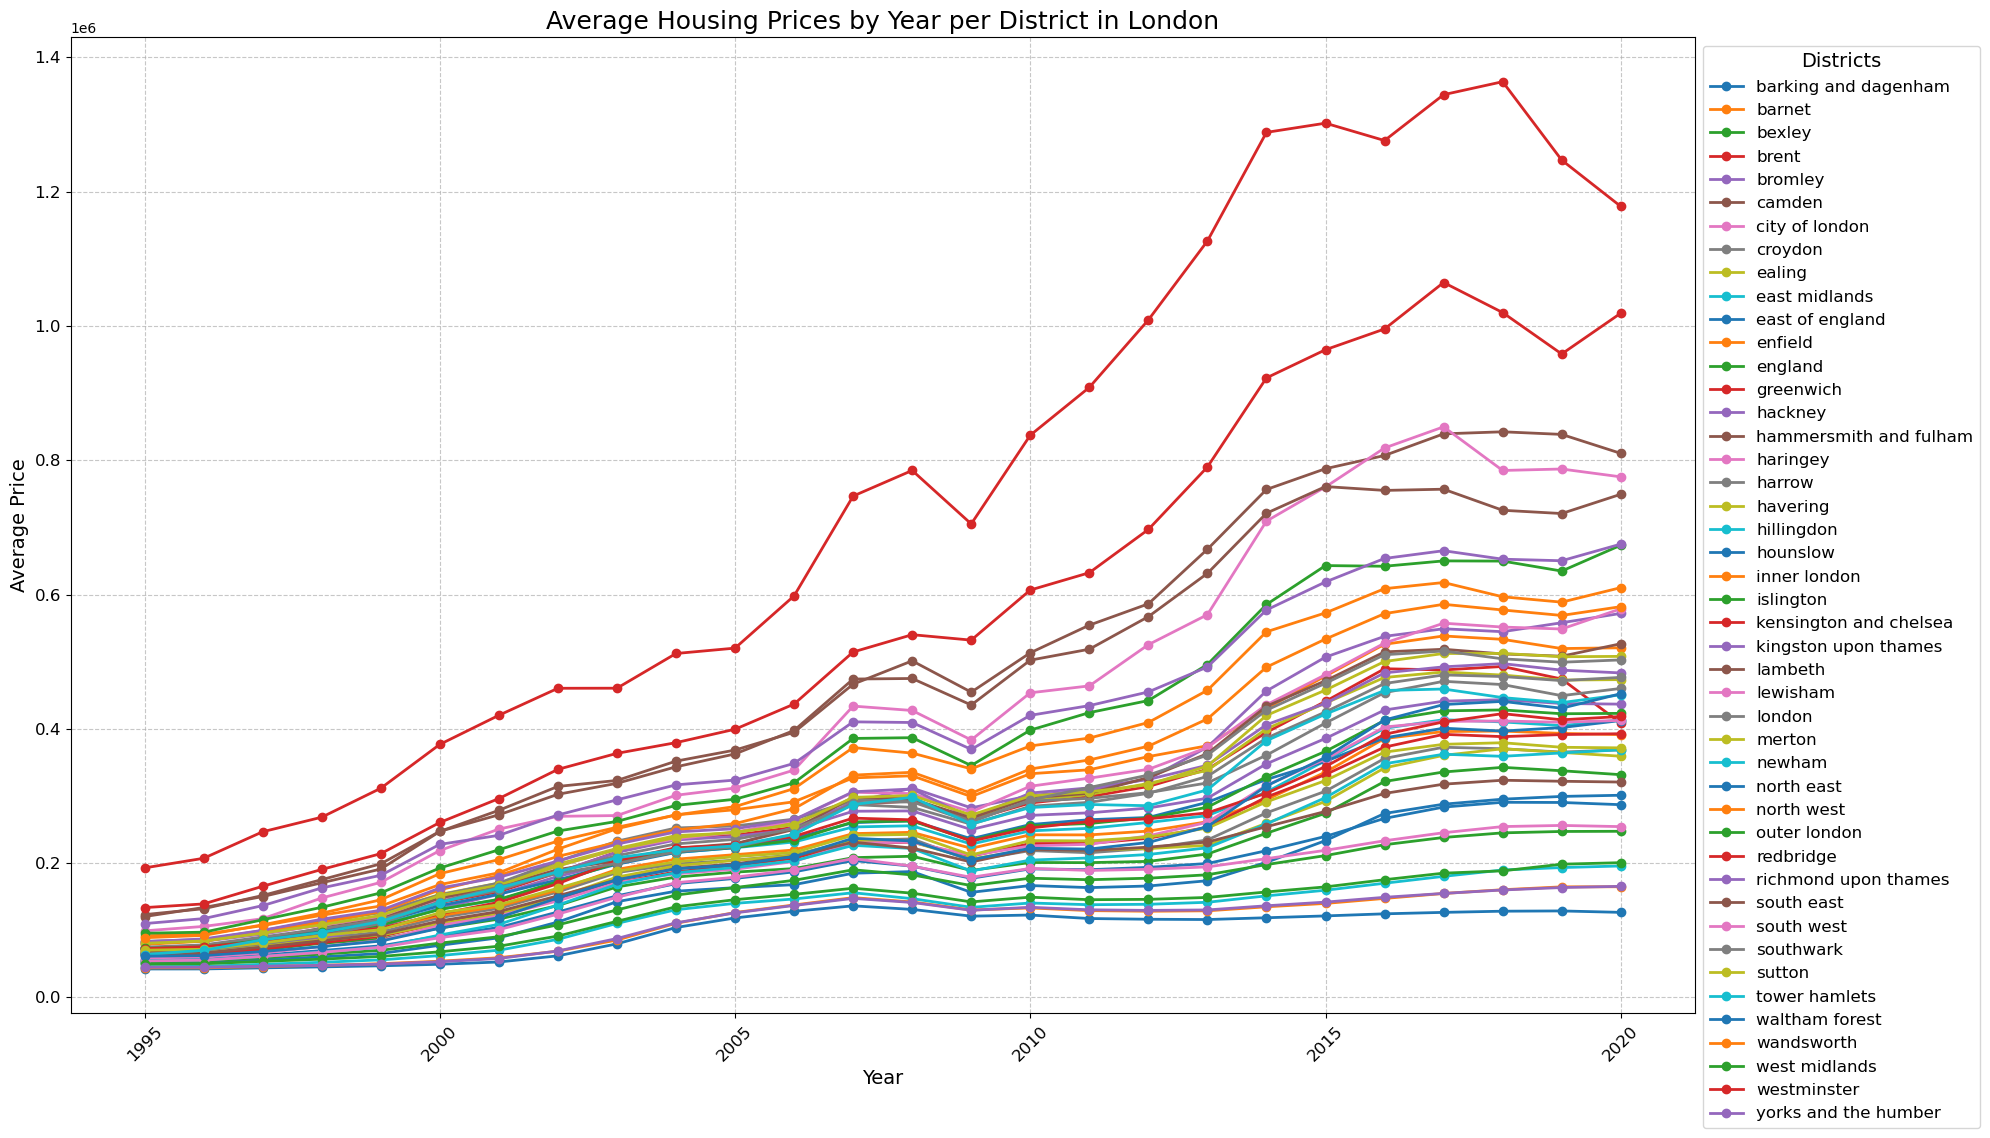

In [8]:
#### per district
housing_merged_districts = housing_df_monthly.groupby(["year", "area"])["average_price"].mean()


plt.figure(figsize=(20, 12))
for area in housing_merged_districts.index.get_level_values('area').unique():
    area_data = housing_merged_districts.xs(area, level='area')
    plt.plot(area_data.index, area_data.values, marker='o', linestyle='-', linewidth=2, label=area)

plt.title("Average Housing Prices by Year per District in London", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.legend(title="Districts", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


The housing prices show a less volatile market situation than the airbnbs. All districts experienced a similar trend with a small decline in the years 2007 and 2008, which was caused by the subprime crisis. All districts show an increase in the housing prices, but some had a sharper increase than others.

In [9]:

print("Starting calculations for RQ1 -> What is the influence of hotels and Airbnbs influences the local housing markets and economic activities?")


#################################################
######### correlating housing and airbnb #########
##################################################

#######################
#### per London ########
########################

merged_df_housing_bnb = pd.merge(housing_merged, grouped_df, on="year", how="inner")
print(merged_df_housing_bnb)

correlation = merged_df_housing_bnb['average_price'].corr(merged_df_housing_bnb['price'])

print(f"Correlation between housing prices and Airbnb prices per year over whole London: {correlation:.2f}")

print(housing_df_monthly)


Starting calculations for RQ1 -> What is the influence of hotels and Airbnbs influences the local housing markets and economic activities?
      average_price       price
year                           
2009  259296.896296  120.000000
2010  287559.164815   81.352941
2011  294819.138889  100.631912
2012  309409.501852  112.311783
2013  334589.564815  119.588841
2014  388208.392593  130.981828
2015  421356.100000  130.652194
2016  454884.461111  151.166105
2017  469978.938889  147.373966
2018  467240.674074  136.256877
2019  460056.659259  142.090555
2020  463329.977778  143.248404
Correlation between housing prices and Airbnb prices per year over whole London: 0.86
             date            area  average_price       code  houses_sold  \
0      1995-01-01  city of london          91449  E09000001         17.0   
1      1995-02-01  city of london          82203  E09000001          7.0   
2      1995-03-01  city of london          79121  E09000001         14.0   
3      1995-04-01  city

As a starting point, I am correlating the housing and airbnb prices. A correlation of 0.55 indicates that Airbnb activity has a connection with the housing market in London, potentially influencing it. This could suggest that higher demand for short-term rentals affects long-term housing prices (for example via reduced housing availability or increased competition for properties). However, this analysis is without the temporal component, which is needed to analyse if there might be a delighted influence between the two prices. For this, I am applying a lagged correlation next.

Lagged Correlation

Lagged Correlations (Whole London):
Housing Prices Lag 1: 0.88
Airbnb Prices Lag 1: 0.87
Housing Prices Lag 2: 0.82
Airbnb Prices Lag 2: 0.81
Housing Prices Lag 3: 0.68
Airbnb Prices Lag 3: 0.69


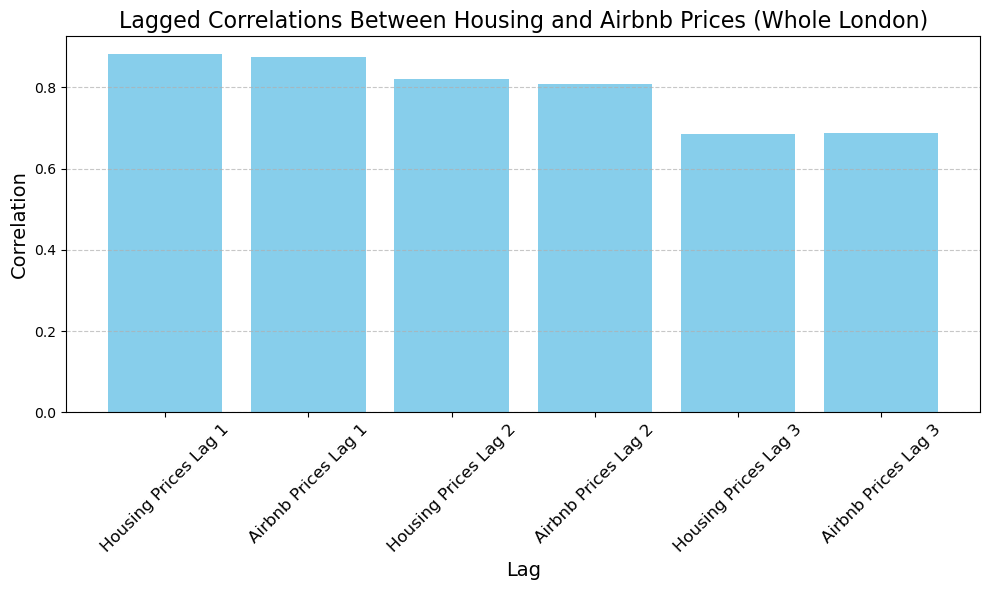

In [10]:
lagged_correlations_london = {}

# Test lags from 1 to 3 years
for lag in range(1, 4):
    # Shift housing prices by the current lag
    merged_df_housing_bnb[f'housing_lag_{lag}'] = merged_df_housing_bnb['average_price'].shift(lag)

    # Calculate correlation between lagged housing prices and Airbnb prices
    correlation_housing = merged_df_housing_bnb[f'housing_lag_{lag}'].corr(merged_df_housing_bnb['price'])
    lagged_correlations_london[f'Housing Prices Lag {lag}'] = correlation_housing

    # Shift Airbnb prices by the current lag
    merged_df_housing_bnb[f'airbnb_lag_{lag}'] = merged_df_housing_bnb['price'].shift(lag)

    correlation_airbnb = merged_df_housing_bnb[f'airbnb_lag_{lag}'].corr(merged_df_housing_bnb['average_price'])
    lagged_correlations_london[f'Airbnb Prices Lag {lag}'] = correlation_airbnb

print("Lagged Correlations (Whole London):")
for key, value in lagged_correlations_london.items():
    print(f"{key}: {value:.2f}")


correlation_df_london = pd.DataFrame(list(lagged_correlations_london.items()), columns=['Lag', 'Correlation'])

plt.figure(figsize=(10, 6))
plt.bar(correlation_df_london['Lag'], correlation_df_london['Correlation'], color='skyblue')
plt.title("Lagged Correlations Between Housing and Airbnb Prices (Whole London)", fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The lagged correlation analysis reveals that both Airbnb prices and housing prices exhibit a consistently high correlation across all lags, with values generally above 0.8 for the whole of London in Lag 1 and Lag 2. This indicates a strong relationship between the two variables, where changes in one are closely mirrored by the other over subsequent years. As not directions shows clear higher values, it could indicate that both prices are dictacted by external facotrs.

Granger Test for whole London

In [12]:
granger_data = merged_df_housing_bnb[['average_price', 'price']].dropna()


# For testing if Airbnb prices Granger-cause housing prices
print("For testing if Airbnb prices Granger-cause housing prices")
grangercausalitytests(granger_data[['average_price', 'price']], maxlag=3)

# For testing if housing prices Granger-cause Airbnb prices
print("Testing if housing prices Granger-cause Airbnb prices")
grangercausalitytests(granger_data[['price', 'average_price']], maxlag=3)


granger_results = {}

# Test Airbnb prices -> housing prices
airbnb_to_housing = grangercausalitytests(granger_data[['average_price', 'price']], maxlag=3, verbose=False)
granger_results['Airbnb -> Housing'] = airbnb_to_housing

# Test housing prices -> Airbnb prices
housing_to_airbnb = grangercausalitytests(granger_data[['price', 'average_price']], maxlag=3, verbose=False)
granger_results['Housing -> Airbnb'] = housing_to_airbnb


visualization_data = []
test_stats = ["ssr_chi2test", "ssr_ftest", "lrtest", "params_ftest"]

for direction, results in granger_results.items():
    for lag, lag_results in results.items():
        for test_stat in test_stats:
            # Extract p-value for the test_stat
            try:
                if isinstance(lag_results[0], dict) and test_stat in lag_results[0]:
                    p_value = lag_results[0][test_stat][1]  # Extract p-value
                    visualization_data.append({
                        "Direction": direction,
                        "Lag": lag,
                        "Test Statistic": test_stat,
                        "p-value": p_value
                    })
            except Exception as e:
                print(f"Error processing {test_stat} for Lag {lag}: {e}")



For testing if Airbnb prices Granger-cause housing prices

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8174  , p=0.2145  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=2.4990  , p=0.1139  , df=1
likelihood ratio test: chi2=2.2519  , p=0.1335  , df=1
parameter F test:         F=1.8174  , p=0.2145  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5692  , p=0.2959  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=6.2766  , p=0.0434  , df=2
likelihood ratio test: chi2=4.8714  , p=0.0875  , df=2
parameter F test:         F=1.5692  , p=0.2959  , df_denom=5, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1246  , p=0.9375  , df_denom=2, df_num=3
ssr based chi2 test:   chi2=1.6822  , p=0.6409  , df=3
likelihood ratio test: chi2=1.5422  , p=0.6726  , df=3
parameter F test:         F=0.1246  , p=0.9375  , df_denom=2, df_num=3
Testing if housing prices Granger-cause Airbnb p

/home/m4/anaconda3/envs/dataprog/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/m4/anaconda3/envs/dataprog/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


The Granger causality analysis indicates a significant causal relationship from housing prices to Airbnb prices at lag 1 (p < 0.05 for multiple tests), suggesting that changes in the housing market influence Airbnb prices in the short term. However, this causal influence is not observed for higher lags (lags 2 and 3), where no significant effects are detected. On the other hand, Airbnb prices do not show a significant causal impact on housing prices at any lag. These findings are in contrast with the correlation analysis, which indicated a strong mutual relationship, emphasizing that while correlations exist, causal influences are predominantly from housing to Airbnb prices, particularly in the short term. This analysis goes against the initial idea that Airbnb pricing trends are a leading indicator of housing market dynamics rather than the other way around.

Visualize Granger Results

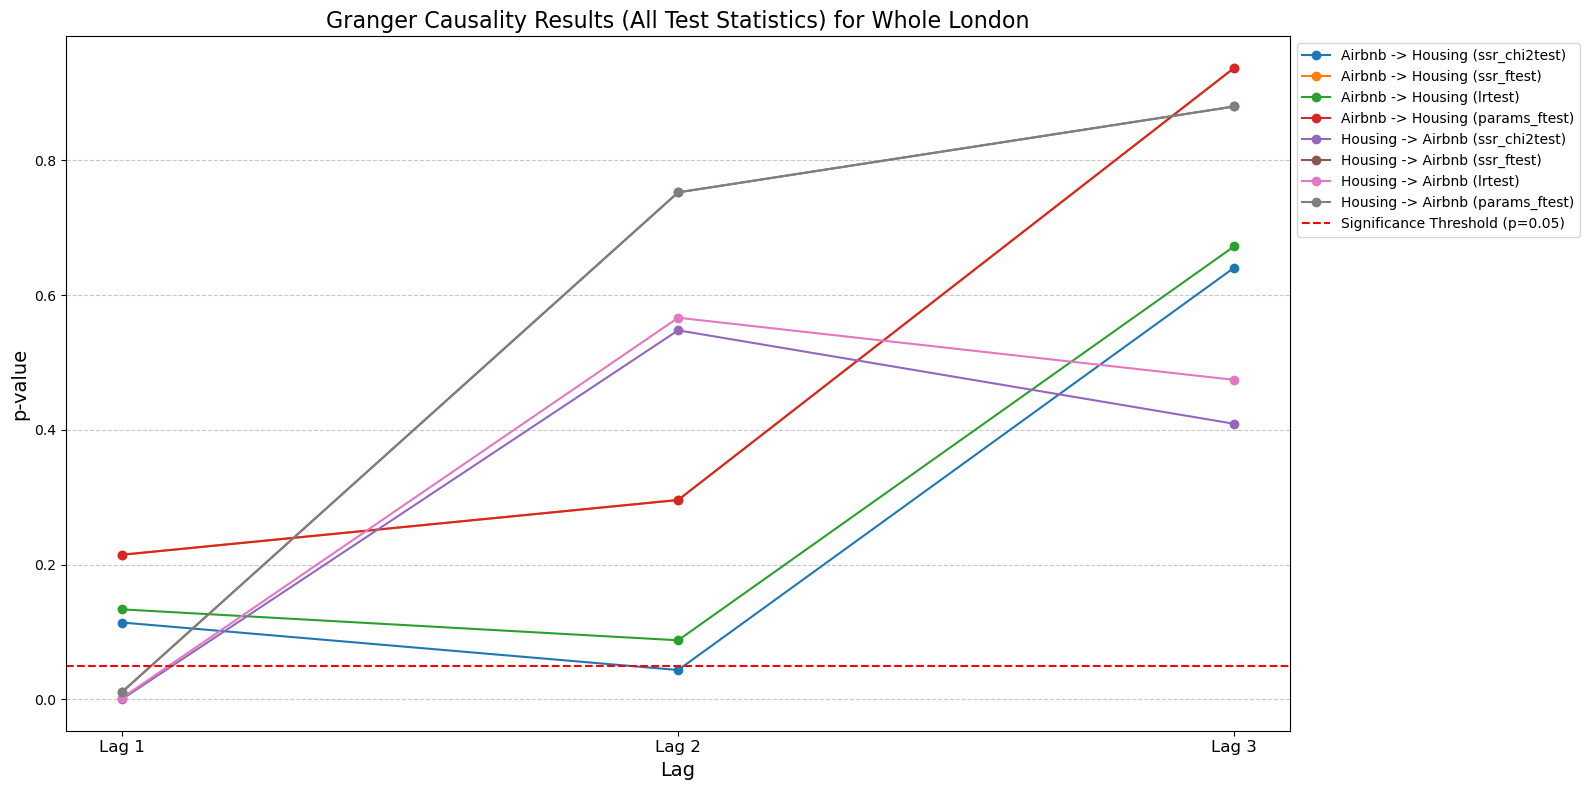

In [13]:
visualization_df = pd.DataFrame(visualization_data)

plt.figure(figsize=(16, 8))
for direction in visualization_df['Direction'].unique():
    for test_stat in visualization_df['Test Statistic'].unique():
        subset = visualization_df[(visualization_df['Direction'] == direction) &
                                   (visualization_df['Test Statistic'] == test_stat)]
        plt.plot(
            subset['Lag'],
            subset['p-value'],
            marker='o',
            label=f"{direction} ({test_stat})"
        )

# Add threshold line
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')

plt.xticks(range(1, 4), labels=[f"Lag {i}" for i in range(1, 4)], fontsize=12)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("p-value", fontsize=14)
plt.title("Granger Causality Results (All Test Statistics) for Whole London", fontsize=16)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This visualization shows again the significance tests for the Granger causality analysis, highlighting the clearer influence for the housing prices on the airbnb marke for lag 1.

Correlating Housing and Airbnb per District

Merged dataset per district:
     year                    area  average_price           neighbourhood  \
0    2009  kensington and chelsea   7.051875e+05  kensington and chelsea   
1    2010                  barnet   3.331281e+05                  barnet   
2    2010                  camden   5.132211e+05                  camden   
3    2010                 hackney   3.004910e+05                 hackney   
4    2010  hammersmith and fulham   5.022568e+05  hammersmith and fulham   
..    ...                     ...            ...                     ...   
320  2020                  sutton   3.716260e+05                  sutton   
321  2020           tower hamlets   4.506690e+05           tower hamlets   
322  2020          waltham forest   4.522990e+05          waltham forest   
323  2020              wandsworth   6.102560e+05              wandsworth   
324  2020             westminster   1.019028e+06             westminster   

          price  
0    120.000000  
1     65.000000  
2   

/tmp/ipykernel_3569/771099491.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df["average_price"].corr(df["price"]))
/tmp/ipykernel_3569/771099491.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


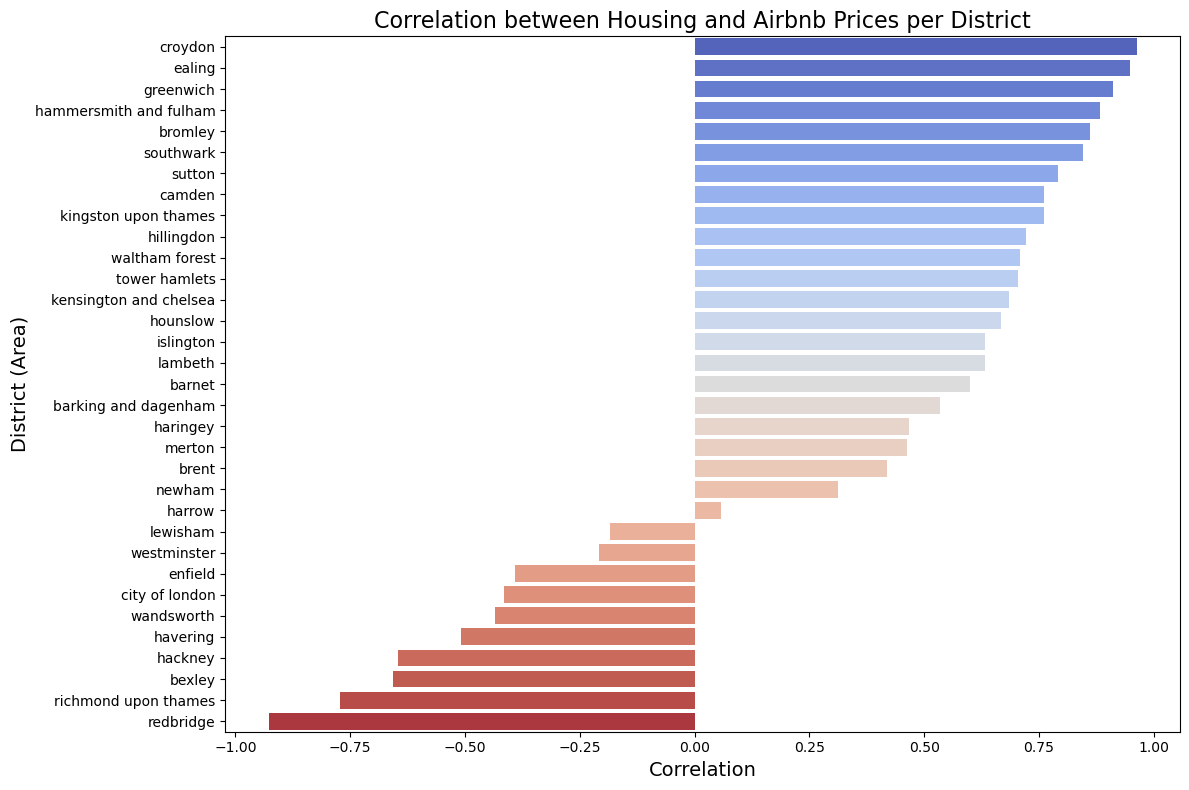

In [14]:

housing_df_monthly['area'] = housing_df_monthly['area'].str.lower()
merged_df['neighbourhood'] = merged_df['neighbourhood'].str.lower()

grouped_housing_districts = housing_df_monthly.groupby(["year", "area"])["average_price"].mean().reset_index()
grouped_airbnb_districts = merged_df.groupby(["year", "neighbourhood"])["price"].mean().reset_index()

merged_districts = pd.merge(
    grouped_housing_districts,
    grouped_airbnb_districts,
    left_on=["year", "area"],
    right_on=["year", "neighbourhood"],
    how="inner"
)

print("Merged dataset per district:")
print(merged_districts)

district_correlations = (
    merged_districts.groupby("area")
    .apply(lambda df: df["average_price"].corr(df["price"]))
    .reset_index(name="correlation")
)


print("\nCorrelation between housing and Airbnb prices per district:")
print(district_correlations)

plt.figure(figsize=(12, 8))
sns.barplot(
    x="correlation",
    y="area",
    data=district_correlations.sort_values("correlation", ascending=False),
    palette="coolwarm"
)
plt.title("Correlation between Housing and Airbnb Prices per District", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("District (Area)", fontsize=14)
plt.tight_layout()
plt.show()


Next, I am analysing the influence of airbnbs on the housing market on the district level. As above, I start with the general correlation. The above summary plot shows that some districts show a strong correlation of above 0.8 (e.g., Croydon, Ealing, Greenwich) while other districts (like richmond upon thames or redbridge) even show an inverse correlation of over -0.7).

Calculating lagged correlations per districts

Lagged Correlations:
Housing Prices Lag 1: 0.08
Airbnb Prices Lag 1: 0.07
Housing Prices Lag 2: -0.18
Airbnb Prices Lag 2: -0.08
Housing Prices Lag 3: -0.19
Airbnb Prices Lag 3: -0.17
Lagged Correlations per District:

District: kensington and chelsea
  Housing Prices Lag 1: 0.68
  Airbnb Prices Lag 1: 0.66
  Housing Prices Lag 2: 0.69
  Airbnb Prices Lag 2: 0.43
  Housing Prices Lag 3: 0.63
  Airbnb Prices Lag 3: 0.02

District: barnet
  Housing Prices Lag 1: 0.75
  Airbnb Prices Lag 1: 0.44
  Housing Prices Lag 2: 0.88
  Airbnb Prices Lag 2: 0.29
  Housing Prices Lag 3: 0.90
  Airbnb Prices Lag 3: 0.17

District: camden
  Housing Prices Lag 1: 0.49
  Airbnb Prices Lag 1: 0.89
  Housing Prices Lag 2: 0.10
  Airbnb Prices Lag 2: 0.95
  Housing Prices Lag 3: -0.48
  Airbnb Prices Lag 3: 0.97

District: hackney
  Housing Prices Lag 1: -0.56
  Airbnb Prices Lag 1: -0.72
  Housing Prices Lag 2: -0.69
  Airbnb Prices Lag 2: -0.79
  Housing Prices Lag 3: -0.66
  Airbnb Prices Lag 3: -0.81

D

<Figure size 1500x800 with 0 Axes>

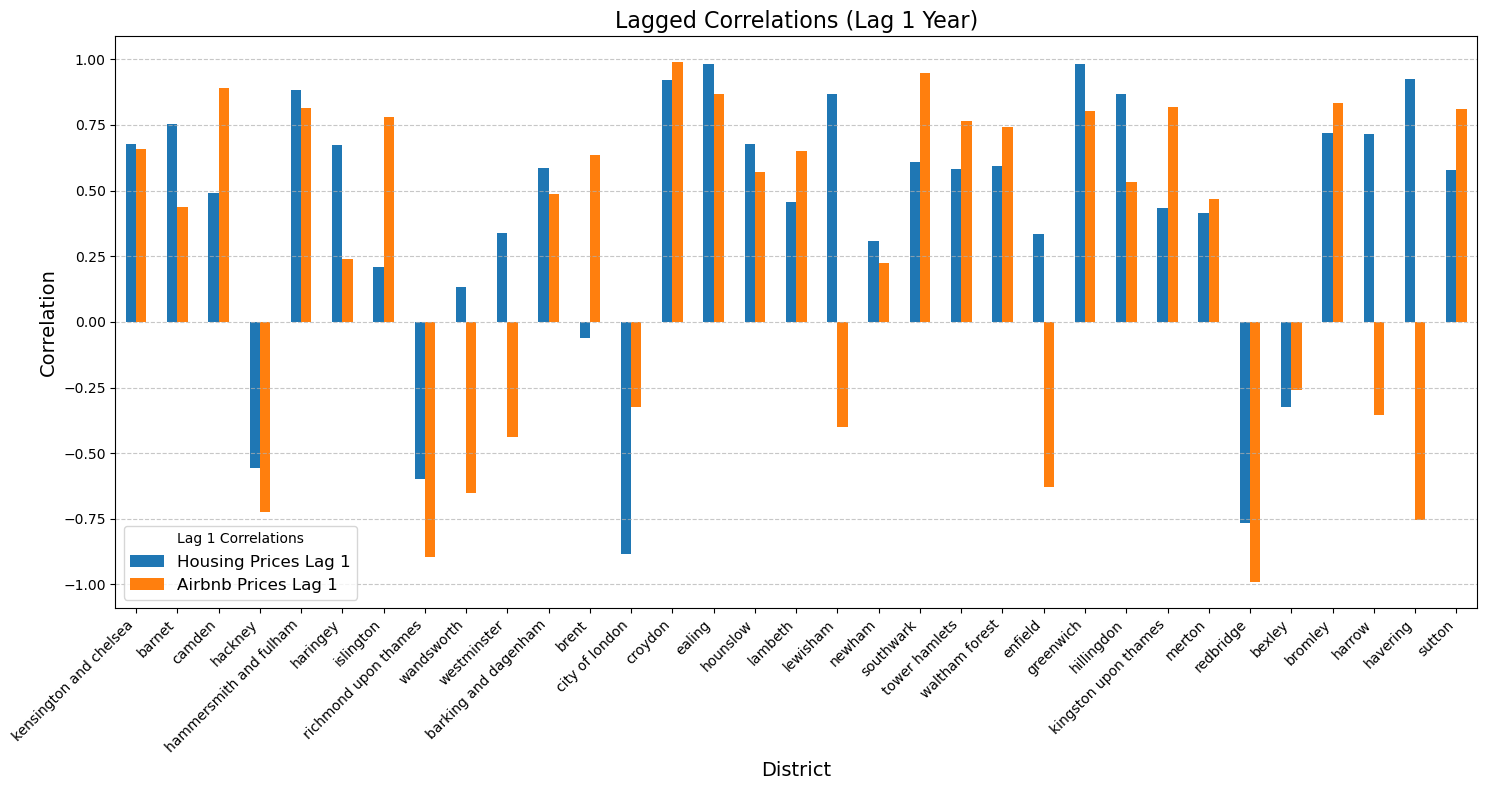

<Figure size 1500x800 with 0 Axes>

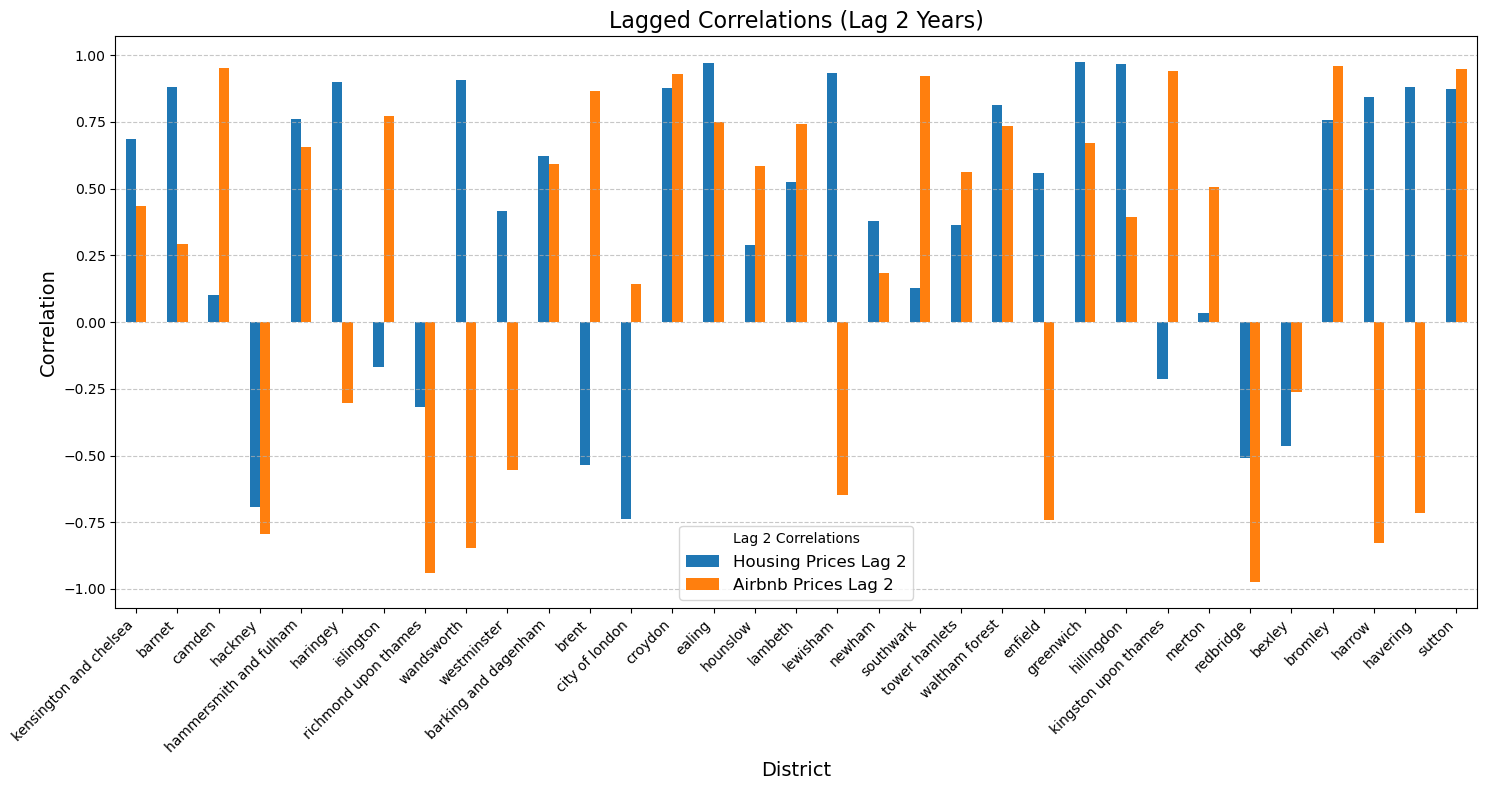

In [15]:

data = merged_districts[['year', 'average_price', 'price']].dropna()


lagged_correlations = {}

for lag in range(1, 4):
    # Shift housing prices by the current lag
    data[f'housing_lag_{lag}'] = data['average_price'].shift(lag)

    # Calculate correlation between lagged housing prices and Airbnb prices
    correlation = data[f'housing_lag_{lag}'].corr(data['price'])
    lagged_correlations[f'Housing Prices Lag {lag}'] = correlation

    # Shift Airbnb prices by the current lag
    data[f'airbnb_lag_{lag}'] = data['price'].shift(lag)

    # Calculate correlation between lagged Airbnb prices and housing prices
    correlation = data[f'airbnb_lag_{lag}'].corr(data['average_price'])
    lagged_correlations[f'Airbnb Prices Lag {lag}'] = correlation

print("Lagged Correlations:")
for key, value in lagged_correlations.items():
    print(f"{key}: {value:.2f}")


##### lagged correlations per district

lagged_correlations_per_district = {}


for district in merged_districts['area'].unique():
    district_data = merged_districts[merged_districts['area'] == district][['year', 'average_price', 'price']].dropna()

    district_lagged_corr = {}

    # Test lags from 1 to 3 years
    for lag in range(1, 4):
        # Shift housing prices by the current lag
        district_data[f'housing_lag_{lag}'] = district_data['average_price'].shift(lag)

        corr_housing = district_data[f'housing_lag_{lag}'].corr(district_data['price'])
        district_lagged_corr[f'Housing Prices Lag {lag}'] = corr_housing

        district_data[f'airbnb_lag_{lag}'] = district_data['price'].shift(lag)

        corr_airbnb = district_data[f'airbnb_lag_{lag}'].corr(district_data['average_price'])
        district_lagged_corr[f'Airbnb Prices Lag {lag}'] = corr_airbnb

    lagged_correlations_per_district[district] = district_lagged_corr


print("Lagged Correlations per District:")
for district, correlations in lagged_correlations_per_district.items():
    print(f"\nDistrict: {district}")
    for lag, value in correlations.items():
        print(f"  {lag}: {value:.2f}")


# Convert lagged correlations dictionary to a DataFrame
lagged_corr_df = pd.DataFrame.from_dict(lagged_correlations_per_district, orient='index')

# Extract data for Lag 1
lag_1_data = lagged_corr_df[['Housing Prices Lag 1', 'Airbnb Prices Lag 1']].reset_index()
lag_1_data.rename(columns={'index': 'District'}, inplace=True)

# Extract data for Lag 2
lag_2_data = lagged_corr_df[['Housing Prices Lag 2', 'Airbnb Prices Lag 2']].reset_index()
lag_2_data.rename(columns={'index': 'District'}, inplace=True)


# Plot for Lag 1
plt.figure(figsize=(15, 8))
lag_1_data.set_index('District').plot(kind='bar', figsize=(15, 8))
plt.title("Lagged Correlations (Lag 1 Year)", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Adjust text rotation and alignment
plt.legend(title="Lag 1 Correlations", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for Lag 2
plt.figure(figsize=(15, 8))
lag_2_data.set_index('District').plot(kind='bar', figsize=(15, 8))
plt.title("Lagged Correlations (Lag 2 Years)", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Adjust text rotation and alignment
plt.legend(title="Lag 2 Correlations", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The analysis of lagged correlations at the district level reveals quite the variation in the relationship between Airbnb prices and housing prices across districts. In the example of Lag 1, 16 districts show a stronger correlation from housing to airbnb price compared to 11 districts in which the airbnb prices correlated with the housing market. Overall, the differences in correlation are generally higher for the housing to airbnb direction. For Lag 2, 17 districts showed higher correlations from housing to airbnb prices compared to 10 districts that showed high correlations in the other direction. This highlights the results before that the influence of housing prices on the airbnb market happens on a localized level. It is therefore dangerous to generalize over whole London. These findings emphasize the need for district-specific policies when considering the impact of short-term rentals on local housing markets and vice versa.

In the following code, not all districts had enough oberservations to calculate the granger test. So we filtered the districts that had at least 5 observations and we limited the lag to 2 (due to prior conflicts due to limited data availability in this timeframe)


Performing Granger Causality Analysis for District: kensington and chelsea

Performing Granger Causality Analysis for District: barnet

Performing Granger Causality Analysis for District: camden

Performing Granger Causality Analysis for District: hackney

Performing Granger Causality Analysis for District: hammersmith and fulham

Performing Granger Causality Analysis for District: haringey

Performing Granger Causality Analysis for District: islington

Performing Granger Causality Analysis for District: richmond upon thames

Performing Granger Causality Analysis for District: wandsworth

Performing Granger Causality Analysis for District: westminster

Performing Granger Causality Analysis for District: barking and dagenham

Performing Granger Causality Analysis for District: brent

Performing Granger Causality Analysis for District: city of london

Performing Granger Causality Analysis for District: croydon

Performing Granger Causality Analysis for District: ealing

Performing Grang

/home/m4/anaconda3/envs/dataprog/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/m4/anaconda3/envs/dataprog/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/m4/anaconda3/envs/dataprog/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/m4/anaconda3/envs/dataprog/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/m4/anaconda3/envs/dataprog/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/m4/anaconda3/envs/dataprog/lib/pyt

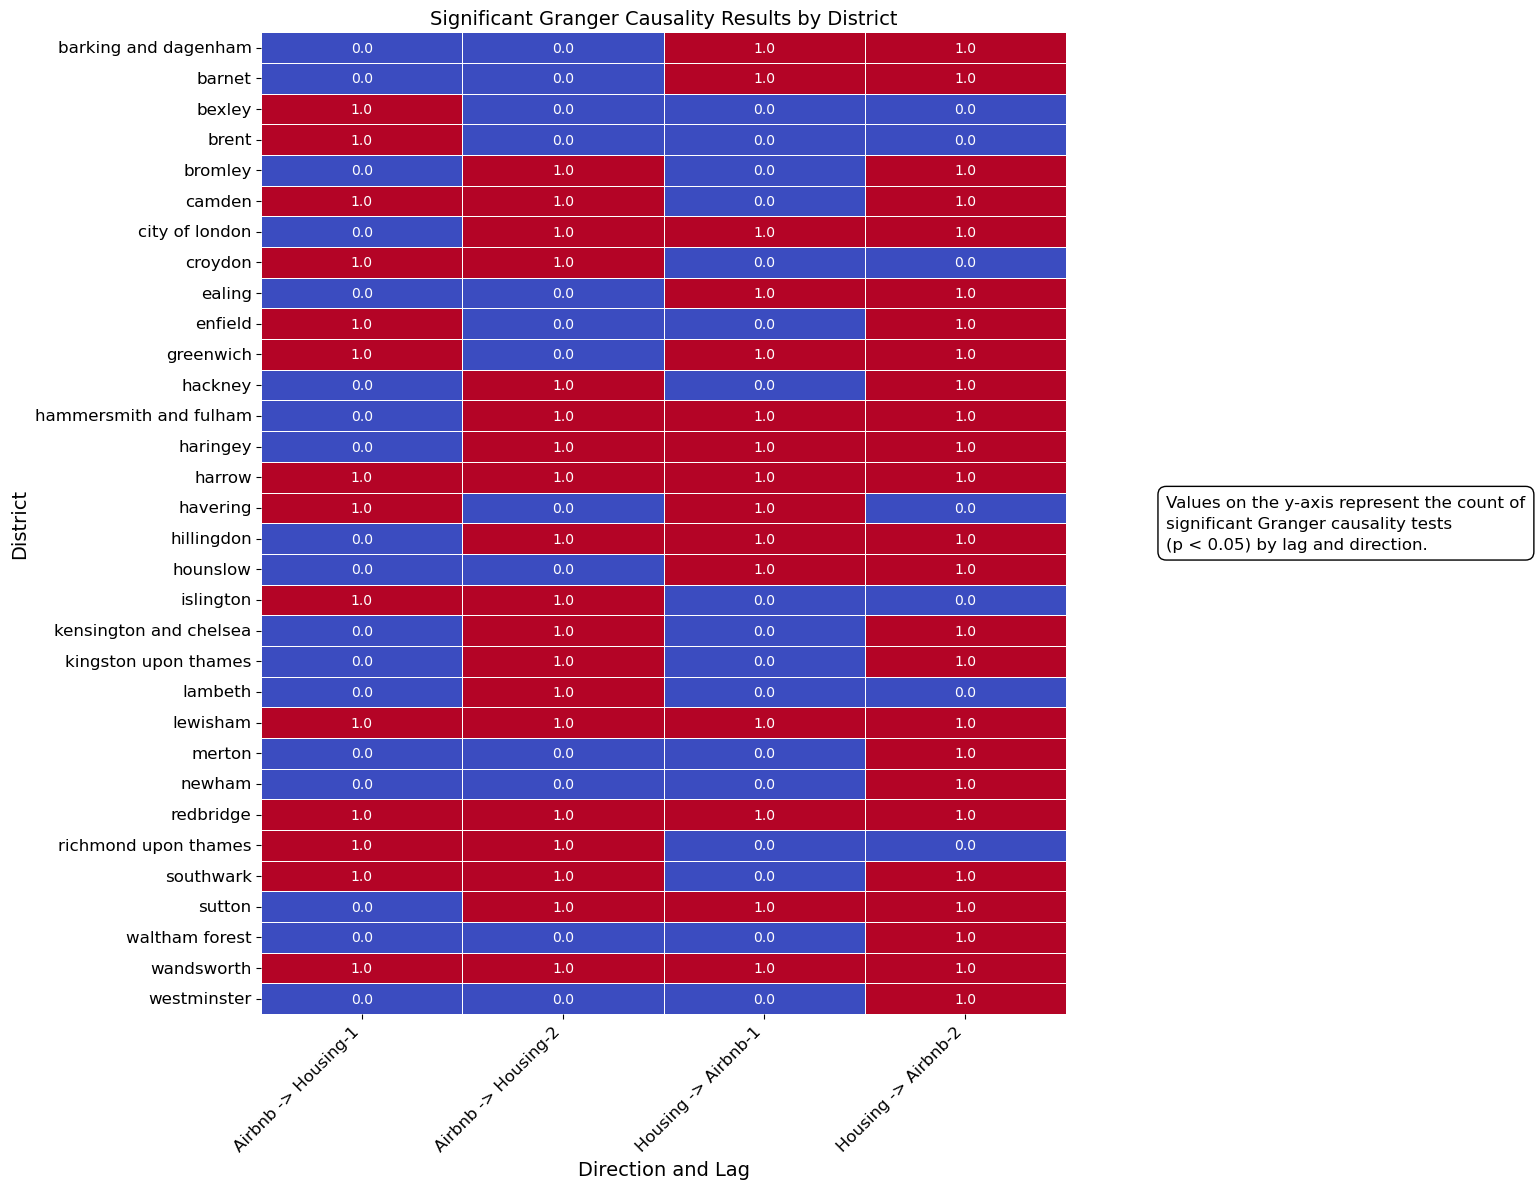

In [16]:
granger_results_per_district = {}

for district in merged_districts['area'].unique():
    print(f"\nPerforming Granger Causality Analysis for District: {district}")

    district_data = merged_districts[merged_districts['area'] == district][['average_price', 'price']].dropna()
    num_obs = len(district_data)

    # Ensure a minimum number of observations of at least 5
    if num_obs < 5:
        print(f"Skipping district {district} due to insufficient data (Only {num_obs} observations)")
        continue

    # Max lag 2 because of data limitation
    maxlag_allowed = min(2, (num_obs - 1) // 3)

    district_granger_results = {}

    try:
        # Airbnb prices -> Housing prices
        airbnb_to_housing = grangercausalitytests(
            district_data[['average_price', 'price']], maxlag=maxlag_allowed, verbose=False
        )
        district_granger_results['Airbnb -> Housing'] = airbnb_to_housing
    except Exception as e:
        print(f"Skipping Airbnb -> Housing for {district} due to error: {e}")

    try:
        # Housing prices -> Airbnb prices
        housing_to_airbnb = grangercausalitytests(
            district_data[['price', 'average_price']], maxlag=maxlag_allowed, verbose=False
        )
        district_granger_results['Housing -> Airbnb'] = housing_to_airbnb
    except Exception as e:
        print(f"Skipping Housing -> Airbnb for {district} due to error: {e}")

    if district_granger_results:
        granger_results_per_district[district] = district_granger_results


summary_results = []

# Extract p-values
for district, results in granger_results_per_district.items():
    for direction, granger_data in results.items():
        for lag, test_results in granger_data.items():
            ssr_chi2_pval = test_results[0]['ssr_chi2test'][1]
            summary_results.append({
                'District': district,
                'Direction': direction,
                'Lag': lag,
                'p-value': ssr_chi2_pval
            })

summary_df = pd.DataFrame(summary_results)

significant_results = summary_df[summary_df['p-value'] < 0.05]
print("\nSignificant Granger Causality Results (p < 0.05):")
print(significant_results)

significant_summary = significant_results.groupby(['District', 'Direction'])['p-value'].count().reset_index()
significant_summary.rename(columns={'p-value': 'Significant Tests Count'}, inplace=True)


visualization_data = significant_results.groupby(['District', 'Direction', 'Lag'])['p-value'].count().reset_index()


pivot_data = visualization_data.pivot_table(
    index='District',
    columns=['Direction', 'Lag'],
    values='p-value',
    fill_value=0
)

plt.figure(figsize=(16, 12))

sns.heatmap(
    pivot_data,
    annot=True,
    cmap='coolwarm',
    fmt='.1f',
    linewidths=0.5,
    annot_kws={"size": 10},
    cbar=False
)

plt.title("Significant Granger Causality Results by District", fontsize=14)
plt.xlabel("Direction and Lag", fontsize=14)
plt.ylabel("District", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.text(
    pivot_data.shape[1] + 0.5,
    pivot_data.shape[0] / 2,
    "Values on the y-axis represent the count of\nsignificant Granger causality tests\n(p < 0.05) by lag and direction.",
    fontsize=12,
    va="center",
    ha="left",
    linespacing=1.5,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)
output_path = r"C:\Users\kmallinger\Documents\Granger_Causality_Heatmap.jpg"

plt.tight_layout()
plt.savefig(output_path, format='jpg', dpi=300)
plt.show()


The granger causality overview gives a similar picture than the lagged correlation plot. Particularly in Lag 1, the difference between housing and airbnb influences is rather small. 14 significant tests for the direction of airbnb to housing and 15 significant tests for housing to airbnb. However, in the Lag 2 scenario, the influence from the housing market to the airbnb prices is with 25 significant tests higher compared to the 19 tests from the airbnb to housing market. However, as both directions show a general causal relationship for some of the same districts, it might be possible that external factors are both influencing the airbnb and housing prices. But its also possible that both factors have a bidirectional influence.

In summary, the analysis shows that the initial hypothesis "airbnb prices influences the housing market" can be weakly rejected for whole London. The tendency is overall higher that housing prices dictate airbnb pricing. However, some districts (like Southwark or Richmond upon Thames) display a clearer dynamic towards airbnb prices influencing housing prices.

# Research Question 2

Let's look back at our broad question for a moment: What impact do hotels or Airbnb apartments have on cities in Europe?

Since hotels and airbnb apartments could be considered a proxy for tourism, our broad question can also be paraphrased as “What impact does tourism have on cities in Europe?”

Intuitively, cities that attract many tourists are likely to see a more significant increase in the number of cafes, restaurants and other tourist-relevant services than less popular tourist destinations, since there is a higher demand for them.

Therefore, it would be logical to investigate if there is a correlation between the number of hotels and other short-term rental options and the number of cafes and restaurants in european cities.

### Selection of cities

The first city we decided to look it is London, as to stay consistent with the previous data sets.

However, London is simultaneously a big city and attracts a lot of tourists, hence it represents only one class of european cities.

To fully investigate the effect of hotels, we would need to look at at least representatives of two other classes:
- a small tourist-attractive city
- a small city that does not known for its tourist attractions.


_Note: It would be ideal to also analyze a big non tourist-attractive city, however, it proved hard to find a representative of this class._

In order to minimize the cultural, political and geographical differences between the cities, it makes sense to stay in one country, namely England, for the analysis.

As the other two cities, we have selected Bath and St. Albans:
 - Bath is a small city with a population of about 94 thousand people (2021 Census), however it is known by tourists for its Roman-built public baths.
 - St. Albans is a city of comparable population to Bath, however it is known to be more of a locals-populated city rather than a tourist-attracting one.

## Loading, merging and cleaning the data

We collected the data needed for the analysis from the [OpenStreetMaps](https://www.openstreetmap.org/) via the [Overpass Api](https://wiki.openstreetmap.org/wiki/Overpass_API).

Since the running time of one Overpass query was approximately 17sec, we extracted the data collection process from this notebook and have stored the collected data in csv files for fast access.

The details of the data collection can be found *INSERT PATH HERE*, but we want to mention a couple of important points about the process here:
- The range of years is [2013, 2024], except for St. Albans where early data is missing.
- Yearly counts are calculated as mean of monthly count for each month in a given year.
- Monthly count is the count at the 1st day of the month.
- We took care of ambiguity in OpenStreetMaps area names by making sure our area filter returns only the location we are interested in (e.g. we took care of filtering out anything named "London" besides the capital of England)

In [26]:
years = range(2013, 2025)
areas = ["London", "St_Albans", "Bath"]
amenities = ["cafe", "restaurant", "car_rental", "hotel"]
dependent_amenities = list(filter(lambda x: x != "hotel", amenities))

In [27]:
amenity_df_dict = {}
area_df_dict = {}

for amenity_index in range(0, len(amenities)):
    amenity = amenities[amenity_index]
    amenity_df = pd.DataFrame(index = years)

    for area_index in range(0, len(areas)):
        area = areas[area_index]

        area_amenity_df = pd.read_csv(f'./data/amenities/{area}/{amenity}.csv')
        area_amenity_df.set_index(['year'], inplace=True)

        if (not area in area_df_dict):
            area_df_dict[area] = pd.DataFrame(index = years)

        area_df = area_df_dict[area]
        area_df[amenity] = area_amenity_df['count']

        area_amenity_df[area] = area_amenity_df['count']
        area_amenity_df.drop(['area', 'count', 'amenity'], axis=1, inplace=True)


        amenity_df = amenity_df.merge(area_amenity_df, how='outer', left_index=True, right_index=True)

    amenity_df_dict[amenity] = amenity_df


Now we have our data conveniently merged in both ways: grouped by amenity type and grouped by area.

Amenity counts for St. Albans:

In [28]:
display(area_df_dict['St_Albans'])

cafe  restaurant  car_rental     hotel
2013   0.000000    0.000000        0.00  0.000000
2014   0.000000    0.000000        0.00  0.000000
2015   0.000000    0.000000        0.00  0.000000
2016   0.000000    0.000000        0.00  0.000000
2017   0.000000    0.000000        0.00  0.000000
2018   0.000000    0.000000        0.00  0.000000
2019  20.416667   26.583333        1.75  5.250000
2020  36.000000   46.000000        3.00  8.083333
2021  35.916667   54.750000        3.00  7.333333
2022  37.666667   61.750000        3.00  6.000000
2023  38.833333   62.000000        4.00  6.000000
2024  42.000000   65.333333        4.00  5.333333

Immediately we can see that St. Albans values are missing before the year 2019. Since having zeroes for all amenity counts can impact our correlation calculations, we should remove years [2013, 2018] from St. Albans data frame.

In [29]:
area_df_dict['St_Albans'].drop(range(2013,2019), inplace=True, errors='ignore')

for area in areas:
    print(area)
    display(area_df_dict[area])

London


cafe   restaurant  car_rental       hotel
2013  1519.666667  2132.750000   37.750000  348.833333
2014  1689.333333  2364.666667   38.500000  374.083333
2015  1912.416667  2588.500000   40.833333  397.500000
2016  2113.750000  2804.833333   41.583333  424.083333
2017  2351.416667  3139.666667   45.833333  447.583333
2018  2575.333333  3388.083333   54.083333  435.583333
2019  2818.583333  3727.583333   61.333333  426.916667
2020  3025.333333  4056.500000   70.250000  356.666667
2021  3158.916667  4347.583333   76.916667  313.166667
2022  3317.833333  4554.666667   80.000000  297.333333
2023  3645.500000  4851.500000   82.666667  309.416667
2024  3945.000000  5085.916667   84.833333  314.583333

St_Albans


cafe  restaurant  car_rental     hotel
2019  20.416667   26.583333        1.75  5.250000
2020  36.000000   46.000000        3.00  8.083333
2021  35.916667   54.750000        3.00  7.333333
2022  37.666667   61.750000        3.00  6.000000
2023  38.833333   62.000000        4.00  6.000000
2024  42.000000   65.333333        4.00  5.333333

Bath


cafe  restaurant  car_rental     hotel
2013  28.916667   29.500000    0.000000  1.666667
2014  29.833333   31.916667    0.000000  2.750000
2015  38.416667   38.083333    0.000000  4.416667
2016  60.333333   48.333333    0.416667  6.250000
2017  89.833333   59.416667    2.000000  5.250000
2018  80.166667   52.500000    2.000000  3.916667
2019  83.000000   46.250000    2.000000  3.250000
2020  79.916667   43.500000    2.000000  2.000000
2021  78.166667   45.500000    2.000000  2.000000
2022  79.000000   48.500000    2.000000  2.000000
2023  79.666667   48.916667    2.000000  2.000000
2024  80.250000   47.250000    1.083333  2.000000

## Visualizations of the data

Now that we have the data cleaned and conveniently merged for analysis, let's take a first look at it by plotting each amenity count per location in one plot.

In [30]:
# Helper function used in interpretation section

def plot_amenity(amenity):
    colors = {
        'hotel': 'blue',
        'cafe': 'orange',
        'restaurant': 'red',
        'car_rental': 'green',
    }

    fig, ax = plt.subplots(1, 3, figsize=(15, 3))

    for area_index in range(0, len(areas)):
        area = areas[area_index]
        years = area_df_dict[area].index
        x = area_df_dict[area][amenity]

        # Plot the hotels line
        ax[area_index].plot(years, x, label=amenity.capitalize(), marker='o', color=colors[amenity])

        ax[area_index].set_title(f'{amenity.capitalize()} in {area}')
        ax[area_index].legend()

    plt.tight_layout()
    plt.show()


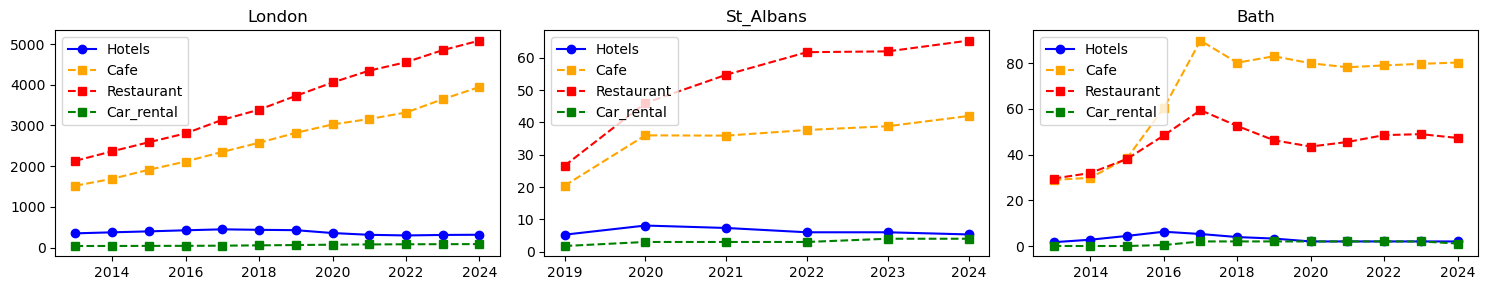

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

colors = ['orange', 'red', 'green']

for area_index in range(0, len(areas)):
    area = areas[area_index]
    years = area_df_dict[area].index
    x = area_df_dict[area]["hotel"]

    # Plot the hotels line
    ax[area_index].plot(years, x, label='Hotels', marker='o', color='blue')

    # Plot the amenity lines
    for amenity_index in range(0, len(dependent_amenities)):
        amenity = dependent_amenities[amenity_index]
        y = area_df_dict[area][amenity]

        ax[area_index].plot(years, y, label=amenity.capitalize(), linestyle='--', marker='s', color=colors[amenity_index])


    ax[area_index].set_title(f'{area}')
    ax[area_index].legend()

plt.tight_layout()
plt.show()

Initially, what we can see is that for all three cities the counts of cafes and restaurants seems to be highly correlated, and that the number of car rentals and hotels is significantly lower.

Due to this discrepancy in the counts scale, it is hard to read the correlation between the number of hotels and other amenities directly from the plot, and another analysis tool should be used for that purpose: scatter matrix and correlation coefficients.


## Scatter matrix & Correlation coefficients

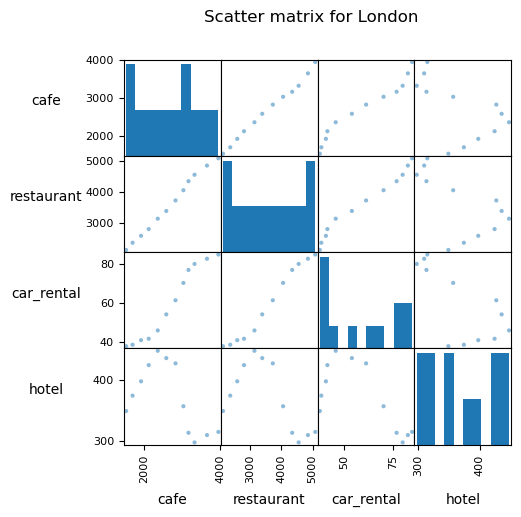

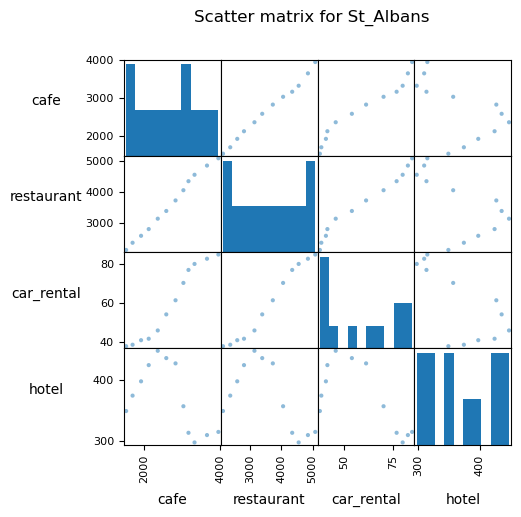

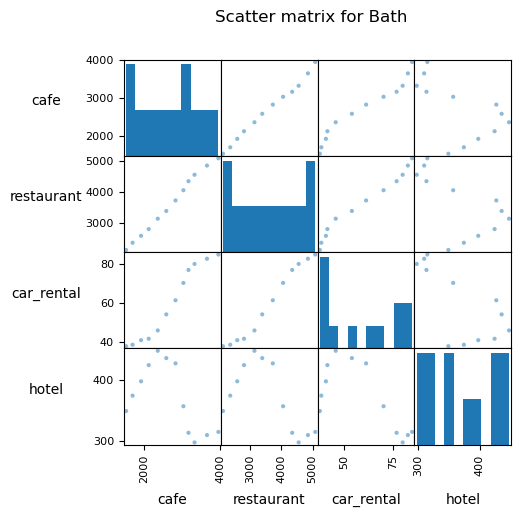

In [32]:
for area in areas:
    sm = pd.plotting.scatter_matrix(area_df_dict['London'], figsize=(5, 5), diagonal='hist')
    plt.suptitle(f'Scatter matrix for {area}')
    [s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
    [s.get_xaxis().set_label_coords(0.5,-0.5) for s in sm.reshape(-1)]
    [s.get_yaxis().set_label_coords(-0.8,0.5) for s in sm.reshape(-1)]


The above scatter matrices confirm very strong positive correlation between the number of cafes and restaurants, however they also highlight string correlation between number of car rentals and number of cafes. The correlation of each dependent amenity with the number of hotels seems weak and rather arbitrary. Let us now confirm it with correlation coefficients:

In [33]:
corr_matrix = np.empty(shape=(len(areas), len(dependent_amenities)))

print('Pearson correlation coefficients:')

for area_index in range(0, len(areas)):
    print()
    for amenity_index in range(0, len(dependent_amenities)):
        area = areas[area_index]
        amenity = dependent_amenities[amenity_index]
        hotel_counts = area_df_dict[area]['hotel']
        amenity_counts = area_df_dict[area][amenity]
        corr_matrix[area_index][amenity_index] = np.corrcoef(hotel_counts, amenity_counts).round(decimals=3)[0][1]
        print(f'{area} (hotels, {amenity}) = {corr_matrix[area_index][amenity_index]}')


Pearson correlation coefficients:

London (hotels, cafe) = -0.559
London (hotels, restaurant) = -0.6
London (hotels, car_rental) = -0.698

St_Albans (hotels, cafe) = 0.217
St_Albans (hotels, restaurant) = -0.002
St_Albans (hotels, car_rental) = 0.004

Bath (hotels, cafe) = 0.008
Bath (hotels, restaurant) = 0.402
Bath (hotels, car_rental) = -0.185


## Interpreting the results

In general, for all cities, we didn't find evidence of a strong positive correlation between the number of amenities used by tourists and the number of hotels.

Let us now look at the data in more details to try and explain why.

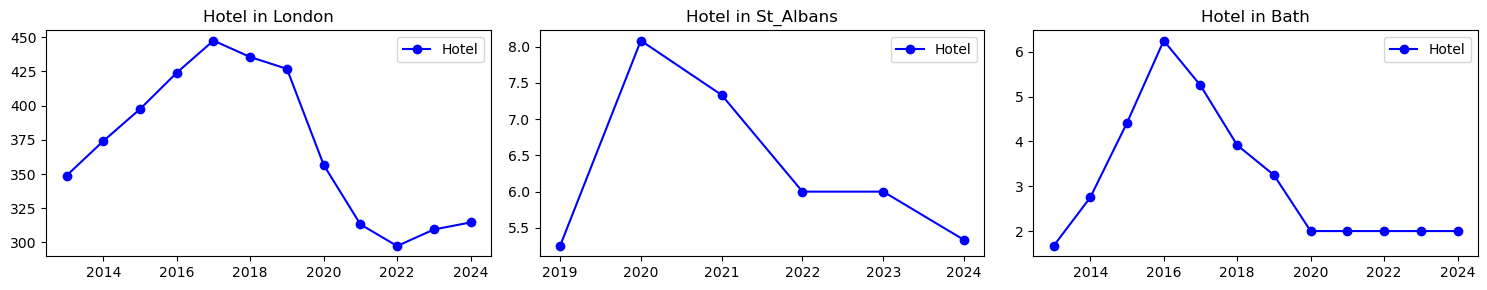

In [34]:
plot_amenity('hotel')

If we plot just the hotels count throughout the years, we can see that they do not rise monotonically in the contrast to other amenities.

London has a drastic fall in the number of hotels in the years 2020-2022. This fall could be attributed to the Covid pandemic. Although it would be reasonable to expect the number of cafes and restaurants to fall in their time period as well, which we don't see indicated in the data, it can be argued that hotels sustained more damage because they are used almost exclusively by the tourists, while cafes, restaurants and car rentals offer their services to the locals as well. This fall could affect the correlation.

However, an even more important issue is that the absolute number of hotels in St. Albans and Bath is quite low: it never exceeds 10. On such small set of hotels, random events could have a huge relative influence.

Considering the above point, we can hardly make a conclusive statement about the correlation of number of hotels and other amenities with respect to St. Albans and Bath.

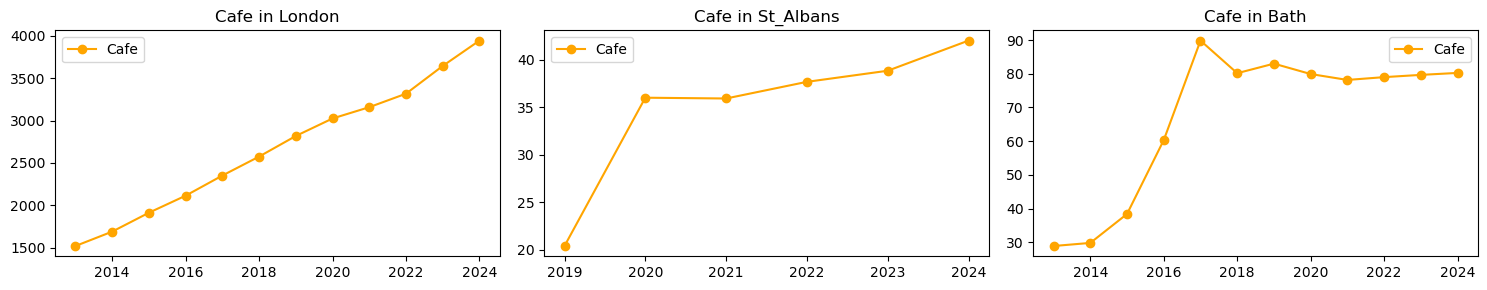

In [35]:
plot_amenity('cafe')

An interesting observation can be made about the number of cafes (and highly correlated number of restaurants) in all three cities.

For London, the number steadily grows, but the slope (speed of grows) seems to have been affected by Covid.

For St. Albans and Bath, there is a clear stagnating or very slowly rising trend preceded by a rapid increase. One of possible explanations of the rapid increase could be that it depicts increase in awareness about OpenStreetMaps in those two cities and subsequent appearance of mappers who add data points, rather than actual increase in the number of amenities.

## Conclusion

The most solid result of our analysis with respect to the original research question is that we observed a negative correlation between the number of hotels and other tourist amenities for London:

| Amenities | Corr. vs Hotels|
| --- | --- |
| Cafe | -0.559 |
| Restaurant | -0.6 |
| Car rental | -0.698 |

This surprising result could be explained by the COVID pandemic since we have seen evidence of the dramatic decrease in hotels but not in cafes in the respective time frame.

While we aren't able to confidently state a conclusion regarding the correlation for St. Albans and Bath due to incredibly small absolute number of hotels, we have observed an interesting "rapid increase then stagnation" pattern for both cities, which could reflect addition of the data points to OpenStreetMaps rather than increase in the actual amenity counts.

On this note, an important disclaimer is that we were using exclusively data from OpenStreetMaps which provides no guarantee to be representable of the real amenity counts.


#### What could have been done better:
- Choose cities that are likely to have realistic amenity counts reflected in OpenStreetMaps
- Choose larger cities with higher absolute counts of amenities
- Collect monthly averages rather than yearly
- Replicate the experiment for more european countries


# Research Question 3

The following steps were undertaken to analyze and plot Airbnb and POIs (Points of Interest) in London, with a focus on determining whether hotels and Airbnb apartments are more prevalent and popular in areas with higher densities of POIs and public transport hubs.

1. Data Loading and Preprocessing
    - Dataset POIs (consolidated_pois.geojson) loaded (from before). Contains geospatial information about POIs in multiple countries and filtered for POIs in England (London)
    - Dataset London Boroughs (london_boroughs.geojson) dataset was loaded and processed to include borough  information for analysis and more specifically plotting.
    - Spatial join between the England POIs dataset and the London boroughs dataset performed to filter  POIs located within London boroughs
    - The Airbnb dataset (listings.csv) joined with London borough dataset for adding informations
    - One-hot-Encoding of tags in POI dataset for further analysis
2. Step in next markdown cell after explained steps from 1)

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import numpy as np
import matplotlib.pyplot as plt

gdf = gpd.read_file('data/pois/accomodation+pois/consolidated_pois.geojson')
gdf = gdf.to_crs(epsg=4326)
# Number_of_reviews > 1
#gdf = gdf.loc[gdf['Number_of_reviews'] > 1]
gdf_england = gdf.loc[gdf['country']== 'united-kingdom']
gdf_boroughs = gpd.read_file('data/rq3/london_boroughs.geojson')
gdf_boroughs = gdf_boroughs.to_crs(epsg=4326)

# Prepare the data
gdf_boroughs = gdf_boroughs.reset_index(drop=True)
gdf_boroughs = gdf_boroughs.rename(columns={'name': 'borough_name', 'index': 'borough_id'})
gdf_boroughs = gdf_boroughs.to_crs(epsg=4326)

# Get only the POIs in London
gdf_poi_london =gpd.sjoin(gdf_england, gdf_boroughs, how='inner', predicate='intersects')
gdf_poi_london.rename(columns={'index_right': 'borough_id'}, inplace=True)


# Get Airbnbs and transform to gdf
df_airbnb = pd.read_csv('data/airbnb_london/listings.csv')
gdf_airbnb = gpd.GeoDataFrame(df_airbnb, geometry=gpd.points_from_xy(df_airbnb.longitude, df_airbnb.latitude), crs="EPSG:4326")
airbnb_gdf_london = gpd.sjoin(gdf_airbnb, gdf_boroughs, how='inner', predicate='intersects')
airbnb_gdf_london.rename(columns={'index_right': 'borough_id'}, inplace=True)

# One-hot encoding for tag_value and prefix with tag_
poi_ohe_tags = pd.get_dummies(gdf_poi_london.tag_key, prefix='tag')
# Merge one-hot encoded tags to the original DataFrame nad rename with prefix tag_
gdf_poi_london = gdf_poi_london.merge(poi_ohe_tags, left_index=True, right_index=True)
# Get encoded tags columns for later use
encoded_tag_columns = [col for col in gdf_poi_london.columns if col.startswith('tag_')]

2. Getting Transport Data for further analysis
    - Subset of POIs with tags specifically related to transport (transport-station, train-station, subway-entrance, and bus-station) was extracted
    - For each Airbnb listing, the minimum distance to the closest transport POI was calculated. This is needed for the analysis of the importance if nearby transport stations

In [2]:
# Get only the transport POIs
transport_tags = ['transport-station', 'train-station', 'subway-entrance', 'bus-station']
gdf_transport_pois = gdf_poi_london[gdf_poi_london['tag_value'].isin(transport_tags)]
# Change the crs to EPSG:27700 (for distance calculation in meters)
gdf_transport_pois = gdf_transport_pois.to_crs(epsg=27700)
airbnb_gdf_london = airbnb_gdf_london.to_crs(epsg=27700)

# Calculate distance between each Airbnb and the closest transport POI
distances_airbnb_transport = []
for idx, airbnb in airbnb_gdf_london.iterrows():
    distances = gdf_transport_pois.geometry.distance(airbnb.geometry)
    distances_airbnb_transport.append(distances.min())

# Add the distances to the Airbnb GeoDataFrame
airbnb_gdf_london['distance_to_transport'] = distances_airbnb_transport
# Change the crs to EPSG:4326
airbnb_gdf_london = airbnb_gdf_london.to_crs(epsg=4326)

3. Grid Creation
    - Grid resolution of 1000 meters (1 km) was chosen to divide London into manageable, uniformly sized cells for spatial aggregation. This was used for simplicity and efficiency reasons
    - Spatial join was performed to assign POIs to the grid cells they intersect
    - Aggregation of POI data (Number if POIs in a Grid, Number of occurences of each tag in a Grid)
    - Aggregation of (Number of Airbnbs in a Grid, avg distance to transport POI of Airbnbs in a Grid)
    

In [3]:
# Define grid resolution (e.g., 500 meters)
grid_size = 1000  # meters
crs = "EPSG:27700"  # British National Grid (to measure in meters)
gdf_boroughs = gdf_boroughs.to_crs(crs)

# Get bounds of London boroughs
minx, miny, maxx, maxy = gdf_boroughs.total_bounds

# Create grid cells
x_coords = np.arange(minx, maxx, grid_size)
y_coords = np.arange(miny, maxy, grid_size)

grid_cells = []
for x in x_coords:
    for y in y_coords:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))

# Create GeoDataFrame for the grid
grid = gpd.GeoDataFrame(geometry=grid_cells, crs=crs)
grid = gpd.clip(grid, gdf_boroughs)
grid = grid.to_crs("EPSG:4326")
gdf_boroughs = gdf_boroughs.to_crs("EPSG:4326")


# Spatial join to assign POIs to grid cells
poi_in_grid = gpd.sjoin(gdf_poi_london, grid, how='inner', predicate='intersects')
poi_in_grid = poi_in_grid.rename(columns={'index_right': 'index_borough'})

# Count POIs in each grid cell
grid['poi_density'] = poi_in_grid.groupby('index_borough').size()
grid['poi_density'] = grid['poi_density'].fillna(0)

# Get aggregated tag values for each grid cell
aggregated_poi_tags = poi_in_grid.groupby('index_borough')[encoded_tag_columns].sum()
aggregated_poi_tags = aggregated_poi_tags.reset_index()
# Merge the aggregated one-hot encoded tags with the grid
grid = grid.merge(aggregated_poi_tags,left_index=True ,right_index=True,how='left')
grid[encoded_tag_columns] = grid[encoded_tag_columns].fillna(0)

# Spatial join to assign Airbnb listings to grid cells
airbnb_in_grid = gpd.sjoin(airbnb_gdf_london, grid, how='inner', predicate='intersects')
poi_in_grid = poi_in_grid.rename(columns={'index_right': 'index_borough'})
# Calculate Airbnb metrics for each grid cell
grid['listing_count'] = airbnb_in_grid.groupby('index_right').size()
grid['average_reviews'] = airbnb_in_grid.groupby('index_right')['number_of_reviews_ltm'].mean()
grid['average_reviews'] = grid['average_reviews'].fillna(0)
grid['listing_count'] = grid['listing_count'].fillna(0)
# Calculate the average distance to transport POIs for each grid cell
grid['average_distance_to_transport'] = airbnb_in_grid.groupby('index_right')['distance_to_transport'].mean()

4. Plot  Airbnbs, POIs, and Transport POIs in London
- Get a basic understanding of data and how it plays out.
- Is clustered, hence abstraction is needed

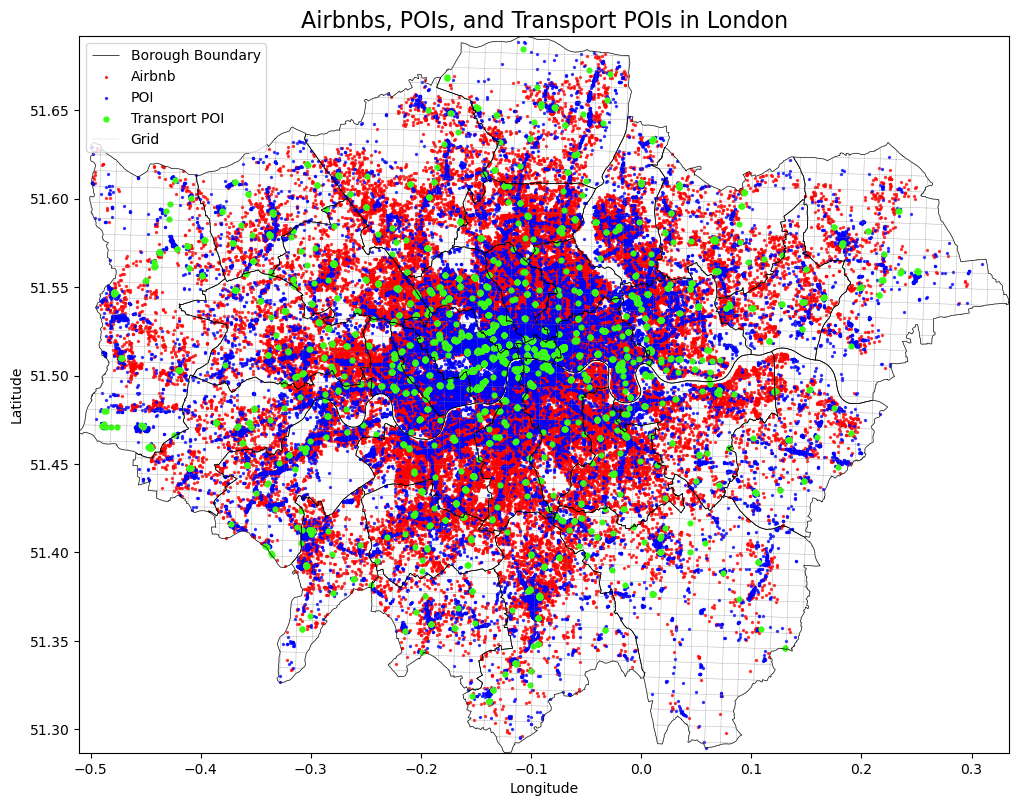

In [4]:
# Plot the data on a map
fig, ax = plt.subplots(figsize=(12, 12))

# Add data to the plot
gdf_boroughs.boundary.plot(ax=ax, color='black', linewidth=0.5, label='Borough Boundary')
airbnb_gdf_london.plot(ax=ax, color='red', markersize=2, alpha=0.7, label='Airbnb')
gdf_poi_london.plot(ax=ax, color='blue', markersize=2, alpha=0.7, label='POI')
gdf_transport_pois.to_crs(epsg=4326).plot(ax=ax,color='#39FF14',markersize=12,alpha=1.0, label='Transport POI')

# Add grid cells
grid.boundary.plot(ax=ax, color='gray', linewidth=0.3, linestyle='--', alpha=0.5, label='Grid')

# Add rest of the plot elements
plt.legend(loc='upper left')
ax.set_title('Airbnbs, POIs, and Transport POIs in London', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Minimize unused space around the plot
ax.set_xlim(gdf_boroughs.total_bounds[[0, 2]])
ax.set_ylim(gdf_boroughs.total_bounds[[1, 3]])

plt.show()

5. Heatmaps of Airbnb listings and POIs
- Abstraction needed for less cluttered analysis


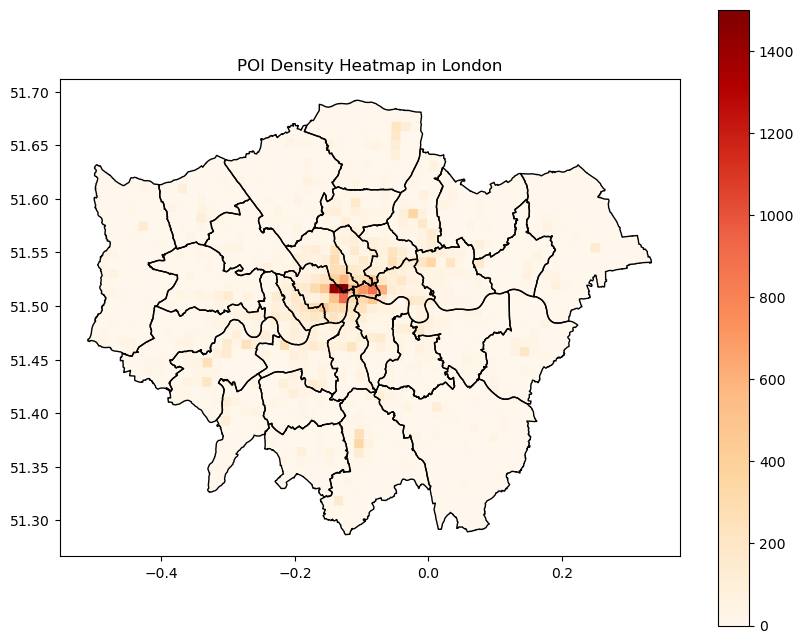

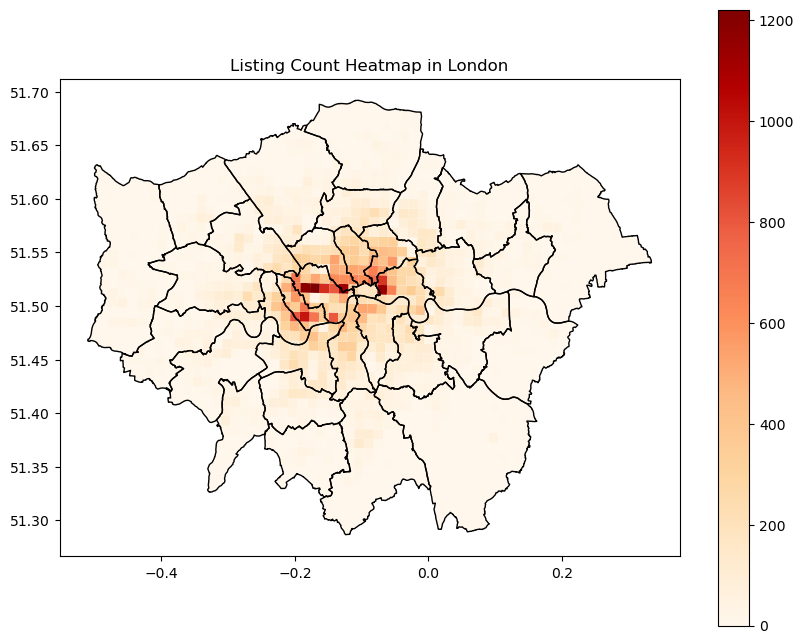

In [5]:
# POI Density Heatmap with Borough Boundaries
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
grid.plot(column='poi_density', cmap='OrRd', legend=True, ax=ax)
gdf_boroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
plt.title('POI Density Heatmap in London')
plt.show()

# Listing Count Heatmap with Borough Boundaries
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
grid.plot(column='listing_count', cmap='OrRd', legend=True, ax=ax)
gdf_boroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
plt.title('Listing Count Heatmap in London')
plt.show()

6. Correlation of different features with listing_count (how many Airbnbs in one Grid) to get indicators for influence of Count of Airbnb listings - Key observations

- Strongest Positive Correlation:
    - poi_density: areas with high density of POIs tens to have more Airbnb listings
    - index_borough: borough-specific factors also play a role in determining the number of listings
- Moderate Positive Correlation:
    - average_reviews: grid cells with higher average reviews per Airbnb listing have slightly higher densities of listings. Probably due to popular areas with greater demand
- Moderate Negative Correlation:
    - average_distance_to_transport: farther from transport POIs tend to have fewer Airbnb listings. Hence, the proximity of transportation spots seems to be important

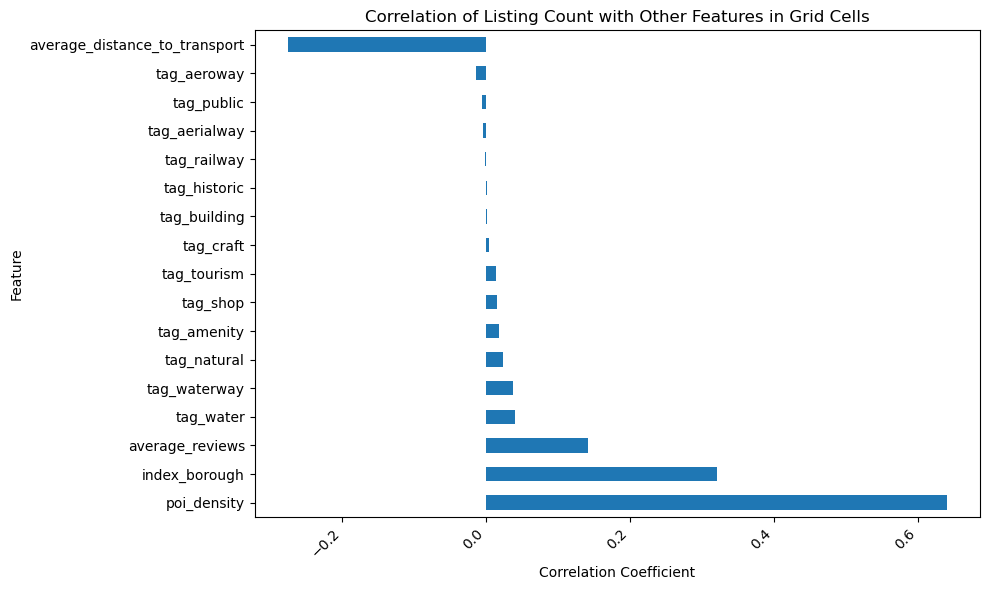

In [6]:
# Compute correlation with listing_count and plot
correlations = grid[grid.select_dtypes(include=['float64', 'int64']).columns].corr()['listing_count'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations[1:].plot(kind='barh')
plt.title('Correlation of Listing Count with Other Features in Grid Cells')
plt.ylabel('Feature')
plt.xlabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Research Question 4**

**Can you predict the prices of Airbnb apartments based on the available features?**

Of particular interest was also if the surrounding points of interest (that we scraped) can increase the prediction of the airbnb apartment prices. To evaluate this research question, I used the Airbnb data from insideairbnb.com, as well as the scraped Point of Interest data from OpenStreetMap. The respective datasets did not have any missing data, only 0 values for respective categories that were still relevant.

**Why is this important?**

This research aspect explores the predictive power of apartment features and external factors, such as points of interest, on Airbnb prices, providing insights into critical factors influencing short-term rental pricing. By incorporating scraped data on points of interest, it examines whether localized environmental factors significantly influence pricing, which can help renters for determining their next Airbnb location.

## Data gathering & processing
To answer this question we first had to find relevant Point of Interest (PoI) data from a datasource that encompasses a broad area. For this we choose the crowd sourced OpenStreetMap data. To get this data we fetched the whole dataset of country specific extracts for continental europe from [geofabrik](https://download.geofabrik.de/europe.html).

From this dataset we then extracted geolocations and relevant tags for a broad selection of potentially relevant PoIs. This includes all tags related to amenities, tourism, public transport, building and historical points (even more but this gives a nice overview). For documentation on how what exactly was extracted and how it was consolidated, look at the install_data.txt. This step was required as the original dataset of OSM data was roughly 30gb alone.

These country specific dataset were then consolidated using the consolidate_geojson.py where we deduplicated the dataset. OSM data has tag specific guidelines on how to create datapoints. As these are crowd sourced they contain duplicates and other problematic entries like a single point + a geometric shape for certain PoIs. These were deduplicated using coordinate projections and points that fall within these geometries were eliminated. Afterwards the centroid of the polygon was used as a center of the PoI. 

Once we had our final list of PoIs we extracted certain features from the tags (metadata) like if there was a wikipedia article or wikimedia image associated with it. Also a proxy for popularity was used to get a feeling of how important a PoI is. A simple metric was the total tag count as popular elements have more data associated with them.

The next step was gathering the training examples for our Airbnb listings. These were taken from all european cities listed on [insideairbnb](https://insideairbnb.com/get-the-data/). The data was gathered using the download-airbnb.py and a list of download urls to each cities listing. Since the data was quite large and contained irrelevant columns like textual data about the host or urls to images inside the listing a preliminary filter was applied to remove them. Also all datapoints that did not contain pricing information were removed as this is our target variable.

The next step was cleaning up the resulting airbnb listings and extracting a few feature columns to give the algorithms a better chance of coming up with reasonable price estimates. This included the removal of additionally unuseful columns like when the dataset was last fetched on insideairbnb's side and what internal ID the region had. We also removed all datapoints that did not have any ratings as these rows were not representative of people actually booking them. Fanasy prices or outliers were removed by that. Also all listings with incomplete review data were removed as well. Listings with out of the ordinary minimum booking time (over 90 days) and maximum booking times over 3 years were also excluded as they do not represent short/mid term bookings or were numerical glitches from the airbnb systems.

The following transformations were applied to the data:

* Log transformation to numerical columns like "How many listings a host has other than the current one", "Host has been host for x days"
* Host response time was encoded from categorical data to hierarchical, weighted on faster response
* Host response and acceptance rates were transformed into percentages
* Boolean values were one-hot-encoded with NaNs defaulting to 0 as listings that don't include such information do not provide the amenity (going by the principle, if it adds value it would have been mentioned by the host)
* Missing numerical values like bathroom/bed count were set to 0 going by the same principle
* Room types were transformed into categorical OHE features (e.g. shared room, entire apartment, hotel room)
* Property types (which kind of property is the listing located on) were quite diverse and could not directly be added using OHE, so we had to group these into these groups('hotel' 'bnb' 'guesthouse' 'apartment' 'suite' 'house' 'other' 'room' 'campsite' 'farm' 'hostel' 'tent') which were then again categorical values encoded using OHE.
* Amenities provided by the listing were tough to group as this is a free-text input on the hosts side. There were over 1.4 million unique amenities so they had to be consolidated and grouped into different categories (e.g. thousands of different types of shampoos provided -> Bath Supplies) which were then counted based on how many times this category came up in the listing.

Afterwards all intermediary columns were dropped and the data was enriched using the PoI data from before. For each listing the total PoIs within certain radii (500m, 1000m, 5000m) were calculated as well as the individual counts of each type of PoI occurence in said radii. This training set was then stored for the ML steps.

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import geopandas as gpd
from shapely.geometry import Point
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor
import gc

In [2]:
df = pd.read_csv('./dataprog/airbnb-listings.csv')
print(len(list(df.columns)))
print(df.columns)

FileNotFoundError: [Errno 2] No such file or directory: './dataprog/airbnb-listings.csv'

In [3]:
df = df.drop(columns=['last_searched', 'requires_license', 'region_id',
       'region_name', 'region_parent_id', 'region_parent_name',
       'region_parent_parent_id', 'region_parent_parent_name'], errors='ignore')

print(len(list(df.columns)))
print(df.columns)
print(df.dtypes)
print(df['price'].count())
print(df['price'].str.contains(r'\$', na=False).sum())

51
Index(['id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_b

In [4]:
print(df.isna().sum())

id                                                   0
host_since                                           2
host_response_time                               95780
host_response_rate                               95780
host_acceptance_rate                             65006
host_is_superhost                                20273
host_listings_count                                  2
host_total_listings_count                            2
host_has_profile_pic                                 2
host_identity_verified                               2
latitude                                             0
longitude                                            0
property_type                                        0
room_type                                            0
accommodates                                         0
bathrooms                                          478
bedrooms                                           839
beds                                              1429
amenities 

### Clean Columns

In [5]:
df = df.dropna(subset=['host_since','review_scores_rating']) # no ratings means likely no bookings => fantasy prizes or false data
print(df.isna().sum())
df = df.dropna(subset=['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                       'review_scores_communication','review_scores_location','review_scores_value'])
print(df.isna().sum())

id                                                  0
host_since                                          0
host_response_time                              55976
host_response_rate                              55976
host_acceptance_rate                            27076
host_is_superhost                               18130
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                         225
bedrooms                                          351
beds                                              759
amenities                   

In [6]:
parse_date = pd.Timestamp('2025-01-21')
df['host_since_date'] = pd.to_datetime(df['host_since'])
df['host_for_days'] = (parse_date - df['host_since_date']).dt.days + 1
df['host_for_log'] = np.log(df['host_for_days'])

df['host_listings_log'] = np.log(df['calculated_host_listings_count'] + 1)
df['host_listings_homes_log'] = np.log(df['calculated_host_listings_count_entire_homes'] + 1)
df['host_listings_private_log'] = np.log(df['calculated_host_listings_count_private_rooms'] + 1)
df['host_listings_shared_log'] = np.log(df['calculated_host_listings_count_shared_rooms'] + 1)

In [7]:
print(df['host_response_time'].unique())
response_time_mapping = {
    'within an hour': 10,
    'within a few hours': 7,
    'within a day': 5,
    'a few days or more': 2,
    np.nan: 1  # Handle NaN or missing values
}
df['host_response_time_ord'] = df['host_response_time'].map(response_time_mapping)

['within an hour' 'within a few hours' nan 'within a day'
 'a few days or more']


In [8]:
print(df['host_response_rate'].unique())
print(df['host_acceptance_rate'].unique())
extract_perc = re.compile(r"(\d+)\%")
def extract_percentage(value):
    if pd.isna(value):
        return 0.0
    match = extract_perc.search(value)
    if match:
        return float(match.group(1)) / 100
    return 0.0
df['host_response_rate_percent'] = df['host_response_rate'].apply(extract_percentage)
df['host_acceptance_rate_percent'] = df['host_acceptance_rate'].apply(extract_percentage)
print(df['host_response_rate_percent'].unique())
print(df['host_response_rate_percent'].unique())

['100%' nan '50%' '70%' '83%' '75%' '99%' '98%' '92%' '89%' '33%' '90%'
 '78%' '0%' '80%' '67%' '29%' '96%' '82%' '60%' '95%' '30%' '94%' '97%'
 '91%' '88%' '40%' '10%' '86%' '71%' '65%' '54%' '93%' '44%' '56%' '20%'
 '42%' '17%' '73%' '34%' '25%' '63%' '13%' '43%' '57%' '59%' '87%' '84%'
 '79%' '53%' '22%' '46%' '14%' '11%' '66%' '55%' '51%' '62%' '85%' '77%'
 '23%' '38%' '68%' '16%' '81%' '64%' '39%' '36%' '74%' '5%' '72%' '76%'
 '48%' '69%' '32%' '52%' '31%' '58%' '27%' '61%' '47%' '7%' '41%' '8%'
 '18%' '37%' '26%' '28%' '15%' '21%' '4%' '9%' '24%' '49%' '45%' '6%'
 '12%' '3%' '35%' '1%' '19%']
['100%' '97%' '71%' '50%' '25%' '75%' '57%' '99%' '13%' '56%' '67%' '92%'
 '31%' '98%' '37%' '86%' '82%' '55%' '0%' '11%' '46%' '83%' '77%' '60%'
 '93%' '70%' '36%' '62%' '45%' '30%' '43%' '78%' '33%' '38%' '95%' '80%'
 '18%' '39%' nan '40%' '61%' '88%' '91%' '53%' '79%' '7%' '52%' '15%'
 '63%' '44%' '29%' '84%' '96%' '35%' '47%' '90%' '59%' '21%' '87%' '73%'
 '20%' '89%' '68%' '85%' '76%' '

In [9]:
print(df['host_is_superhost'].unique())
print(df['host_has_profile_pic'].unique())
print(df['host_identity_verified'].unique())
print(df["has_availability"].unique())
print(df["instant_bookable"].unique())

ohe_mapping = {
    'f': 0,
    't': 1,
    np.nan: 0
}
df['is_superhost'] = df['host_is_superhost'].map(ohe_mapping)
df['is_host_has_pic'] = df['host_has_profile_pic'].map(ohe_mapping)
df['is_host_id_verified'] = df['host_identity_verified'].map(ohe_mapping)
df['is_available'] = df['has_availability'].map(ohe_mapping)
df['is_instant_bookable'] = df['instant_bookable'].map(ohe_mapping)
print(df['is_superhost'].unique())

['f' 't' nan]
['t' 'f']
['t' 'f']
['t' nan 'f']
['t' 'f']
[0 1]


In [10]:
df['listings_count'] = df['host_listings_count'].fillna(0).astype(float).map(int)
df['listings_count_total'] = df['host_total_listings_count'].fillna(0).astype(float).map(int)
df['bathrooms'] = df['bathrooms'].fillna(0)
df['bedrooms'] = df['bedrooms'].fillna(0).map(int)
df['beds'] = df['beds'].fillna(0).map(int)
df['minimum_minimum_nights'] = df['minimum_minimum_nights'].map(int)
df['maximum_minimum_nights'] = df['maximum_minimum_nights'].map(int)
df['minimum_maximum_nights'] = df['maximum_maximum_nights'].map(int)

In [11]:
print(df['room_type'].unique())
room_type_mapping = {
    'Private room': 'private',
    'Entire home/apt': 'entire',
    'Hotel room': 'hotel',
    'Shared room': 'shared'
}
df['type'] = df['room_type'].map(room_type_mapping)
df_room_type_ohe = pd.get_dummies(df['type'], prefix='room_type')
df = pd.concat([df, df_room_type_ohe], axis=1)

['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [12]:
print(df['property_type'].unique())
extract_property_in = re.compile(r"\bin\s([\w\s\/-]+)")
extract_property_entire = re.compile(r"\bEntire\s([\w\s\/-]+)")
def extract_property(value):
    in_match = extract_property_in.search(value)
    if in_match:
        return in_match.group(1).lower()
    entire_match = extract_property_entire.search(value)
    if entire_match:
        return entire_match.group(1).lower()
    return value.lower()

df['property'] = df['property_type'].apply(extract_property)
property_mapping = {
    'bed and breakfast': 'bnb',
    'loft': 'apartment',
    'condo': 'apartment',
    'guest suite': 'suite',
    'rental unit': 'apartment',
    'serviced apartment': 'apartment',
    'townhouse': 'house',
    'boutique hotel': 'hotel',
    'private room': 'room',
    'boat': 'other',
    'houseboat': 'other',
    'casa particular': 'bnb',
    'hut': 'house',
    'farm stay': 'farm',
    'villa': 'house',
    'place': 'apartment',
    'bungalow': 'house',
    'aparthotel': 'hotel',
    'tiny home': 'house',
    'vacation home': 'house',
    'cabin': 'house',
    'barn': 'farm',
    'earthen home': 'house',
    'cottage': 'house',
    'nature lodge': 'house',
    'chalet': 'house',
    'cycladic home': 'house',
    'dome': 'house',
    'yurt': 'tent',
    'in-law': 'house',
    'pension': 'bnb',
    'minsu': 'other',
    'home/apt': 'apartment',
    'cycladic house': 'house',
    'bus': 'other',
    'holiday park': 'other',
    'tipi': 'tent',
    "shepherd’s hut": 'other',
    'shepherd': "other",
    'heritage hotel': 'hotel',
    'lighthouse': 'other',
    'ryokan': 'hotel',
    'dammuso': 'other',
    'riad': 'other',
    'ice dome': 'other',
    'kezhan': 'hotel',
    'trullo': 'house',
    'train': 'other',
    'ranch': 'farm',
    'home': 'house',
    'camper/rv': 'campsite',
    'religious building': 'other',
    'tower': 'other',
    'cave': 'other',
    'island': 'other',
    'plane': 'other',
    'shipping container': 'other',
    'castle': 'other',
    'windmill': 'other',
    'shared room': 'room',
    'resort': 'other',
    'floor': 'other',
    'treehouse': 'other',
    'dorm': 'other'
}
df['property'] = df['property'].map(property_mapping).fillna(df['property'])
print(df['property'].unique())
df_property_type_ohe = pd.get_dummies(df['property'], prefix='property_type')
df = pd.concat([df, df_property_type_ohe], axis=1)

['Room in hotel' 'Private room in bed and breakfast'
 'Private room in guesthouse' 'Entire condo' 'Private room in guest suite'
 'Entire home' 'Entire rental unit' 'Entire serviced apartment'
 'Entire guesthouse' 'Boat' 'Private room in townhouse' 'Entire townhouse'
 'Private room in condo' 'Private room in rental unit'
 'Room in boutique hotel' 'Private room in home' 'Entire loft'
 'Private room' 'Houseboat' 'Private room in houseboat' 'Camper/RV'
 'Private room in loft' 'Private room in casa particular'
 'Private room in boat' 'Private room in hut' 'Private room in farm stay'
 'Entire villa' 'Entire place' 'Private room in bungalow'
 'Room in aparthotel' 'Tiny home' 'Room in bed and breakfast'
 'Shared room in houseboat' 'Entire vacation home' 'Room in hostel'
 'Private room in serviced apartment' 'Casa particular'
 'Shared room in hostel' 'Entire cabin' 'Room in serviced apartment'
 'Entire guest suite' 'Barn' 'Private room in hostel'
 'Private room in earthen home' 'Private room in

In [13]:
print(df[df['minimum_nights'] > 90].shape)
print(df[df['maximum_nights'] > 1124].shape)
print(df[df['maximum_nights'] > 1125].shape)
df = df[df['minimum_nights'] <= 90]
df = df[df['maximum_nights'] <= 1125]
print(df.shape)

(8813, 86)
(166474, 86)
(39, 86)
(580156, 86)


In [14]:
df["availability_30_percent"] = df["availability_30"] / 30
df["availability_60_percent"] = df["availability_60"] / 60
df["availability_90_percent"] = df["availability_90"] / 90
df["availability_365_percent"] = df["availability_365"] / 365

In [15]:
df["price_per_night_dollar"] = df['price'].str.replace(r'\$', '', regex=True).replace(r',', '', regex=True).map(float)

In [16]:
df['amenities_array'] = df['amenities'].apply(eval)
df['total_amenities'] = df['amenities_array'].count()

In [17]:
mapping_table = {
    r'(?i)Free.*parking.*premises': 'Free_Parking',
    r'(?i)Free.*garage.*premises': 'Free_Parking',
    r'(?i)Free.*carport.*premises': 'Free_Parking',
    r'(?i)Paid.*garage.*premises': 'Paid_Parking',
    r'(?i)Paid.*parking.*premises': 'Paid_Parking',
    r'(?i)Paid.*carport.*premises': 'Paid_Parking',
    r'(?i)wifi': 'Internet',
    r'(?i)ethernet': 'Internet',
    r'(?i)body soap': 'Bath_Supplies',
    r'(?i)shampoo': 'Bath_Supplies',
    r'(?i)shower gel': 'Bath_Supplies',
    r'(?i)conditioner': 'Bath_Supplies',
    r'(?i)cooking': 'Kitchen_Supplies',
    r'(?i)dishes and silverware': 'Kitchen_Supplies',
    r'(?i)Dishwasher': 'Kitchen_Supplies',
    r'(?i)Wine glasses': 'Kitchen_Supplies',
    r'(?i)Baking sheet': 'Kitchen_Supplies',
    r'(?i)Barbecue utensils': 'Kitchen_Supplies',
    r'(?i)outdoor': 'outdoor',
    r'(?i)hdtv': 'TV',
    r'TV': 'TV',
    r'(?i)kitchen': 'Kitchen',
    r'(?i)coffee': 'Coffee',
    r'AC': 'Air conditioning',
    r'(?i)Air conditioning': 'Air_conditioning',
    r'EV': 'EV_Charger',
    r'(?i)stove': 'Stove',
    r'(?i)oven': 'Oven',
    r'(?i)high chair': 'Child_friendly',
    r'(?i)children': 'Child_friendly',
    r'(?i)baby': 'Child_friendly',
    r'(?i)Crib': 'Child_friendly',
    r'(?i)washer': 'Washer',
    r'(?i)dryer': 'Dryer',
    r'(?i)game': 'Games',
    r'(?i)grill': 'Grill',
    r'(?i)hot tub': 'Hot_Tub',
    r'(?i)sauna': 'Sauna',
    r'(?i)pool': 'Pool',
    r'(?i)heating': 'Heating',
    r'(?i)view': 'View',
    r'(?i)refrigerator': 'Refrigerator',
    r'(?i)sound system': 'Sound_System',
    r'(?i)housekeeping': 'Housekeeping',
    r'(?i)exercise': 'Exercise',
    r'(?i)gym': 'Exercise',
    r'(?i)exercise': 'Exercise',
    r'(?i)squash': 'Exercise',
    r'(?i)tennis': 'Exercise',
    r'(?i)court': 'Exercise',
    r'(?i)skate': 'Exercise',
    r'(?i)climbing': 'Exercise',
    r'Ski': 'Exercise',
    r'(?i)bowling': 'Exercise',
    r'(?i)batting': 'Exercise',
    r'(?i)bikes?': 'Exercise',
    r'(?i)Hockey': 'Exercise',
    r'(?i)yoga': 'Exercise',
    r'(?i)clothing storage': 'Clothing_storage',
    r'(?i)security': 'Safety_features',
    r'(?i)Gated': 'Safety_features',
    r'(?i)keybad': 'Safety_features',
    r'(?i)safe': 'Safety_features',
    r'(?i)fire pit': 'Fireplace',
    r'(?i)fireplace': 'Fireplace',
    r'(?i)beach.*access': 'Beach',
    r'(?i)bar': 'Bar',
}

def map_amenities(amenities, mapping):
    replaced = []
    for amenity in amenities:
        replaced_amenity = amenity
        for pattern, replacement in mapping.items():
            if re.search(pattern, amenity):
                #replaced_amenity = 
                replaced.append(replacement)
                break
        
    return replaced

df['amenities_array_mapped'] = df['amenities_array'].apply(lambda x: map_amenities(x, mapping_table))

In [18]:
dummies = pd.get_dummies(df['amenities_array_mapped'].explode(), prefix='amenity').groupby(level=0).sum()
df = pd.concat([df, dummies], axis=1)
print(df.head())

                   id  host_since  host_response_time host_response_rate  \
0  888038298563003925  2019-11-22      within an hour               100%   
1            50666229  2021-05-10      within an hour               100%   
2              933523  2013-02-10      within an hour               100%   
4  656222143862971193  2015-07-23  within a few hours               100%   
5            20259345  2014-09-27      within an hour               100%   

  host_acceptance_rate host_is_superhost  host_listings_count  \
0                 100%                 f                  9.0   
1                 100%                 t                  2.0   
2                  97%                 t                  1.0   
4                 100%                 f                  1.0   
5                 100%                 t                  2.0   

   host_total_listings_count host_has_profile_pic host_identity_verified  ...  \
0                        9.0                    t                      

In [19]:
df = df.drop(columns=["host_for_days","host_since_date","host_since","host_response_time","host_response_rate","host_is_superhost",
                 "host_listings_count","host_total_listings_count","host_has_profile_pic","host_acceptance_rate","host_identity_verified",
                 "room_type","type","property","property_type","has_availability","availability_30","availability_60","availability_90",
                 "availability_365","instant_bookable","calculated_host_listings_count","calculated_host_listings_count_entire_homes",
                 "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms", "price", "amenities",
                 "amenities_array","amenities_array_mapped"], errors='ignore')

print(list(df.columns))
df.head()

['id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'country', 'city', 'host_for_log', 'host_listings_log', 'host_listings_homes_log', 'host_listings_private_log', 'host_listings_shared_log', 'host_response_time_ord', 'host_response_rate_percent', 'host_acceptance_rate_percent', 'is_superhost', 'is_host_has_pic', 'is_host_id_verified', 'is_available', 'is_instant_bookable', 'listings_count', 'listings_count_total', 'room_type_entire', 'room_type_hotel', 'room_type_private', 'room_type_shared', 'pr

id   latitude  longitude  accommodates  bathrooms  \
0  888038298563003925  52.370110   4.879090             3        1.0   
1            50666229  52.359452   4.861793             4        1.0   
2              933523  52.356197   4.991435             4        1.5   
4  656222143862971193  52.372422   4.882609             2        1.0   
5            20259345  52.367090   4.865750             2        1.5   

   bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  \
0         1     3               1             365                       1   
1         2     5               4             365                       2   
2         2     2               3              30                       2   
4         1     1               3              10                       2   
5         1     1               1              10                       1   

   ...  amenity_Pool  amenity_Refrigerator  amenity_Safety_features  \
0  ...             0                     0                        1   
1  ...             0                     1                        0   
2  ...             0                     1                        0   
4  ...             0                     1                        0   
5  ...             0                     1                        0   

   amenity_Sauna  amenity_Sound_System  amenity_Stove  amenity_TV  \
0              0                     0              0           1   
1              0                     0              0           1   
2              0                     0              0           1   
4              0                     1              1           1   
5              0                     0              0           1   

   amenity_View  amenity_Washer  amenity_outdoor  
0             0               0                0  
1             2               0                0  
2             4               0                2  
4             1               1                2  
5             2               0                0  

[5 rows x 98 columns]

In [20]:
print(df["country"].unique())
country_mapping = {
    'the-netherlands': 'netherlands',
    'ireland': 'ireland-and-northern-ireland',
}

df['country'] = df['country'].map(country_mapping).fillna(df['country'])

['the-netherlands' 'belgium' 'greece' 'spain' 'italy' 'germany' 'france'
 'united-kingdom' 'denmark' 'ireland' 'switzerland' 'turkey' 'portugal'
 'norway' 'czech-republic' 'latvia' 'sweden' 'austria' 'malta']


In [21]:
output_file_path = "airbnb_cleaned.csv"
df.to_csv(output_file_path, index=False)

print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to airbnb_cleaned.csv


### Consolidate with pois in the area

In [2]:
pois = gpd.read_file("./consolidated_pois.geojson")
df = pd.read_csv("./airbnb_cleaned.csv")
country_crs_mapping = {
    'albania': 32634,
    'kosovo': 32634,
    'andorra': 32631,
    'latvia': 32635,
    'austria': 32633,
    'liechtenstein': 32632,
    'azores': 32626,
    'lithuania': 32635,
    'belarus': 32635,
    'luxembourg': 32631,
    'belgium': 32631,
    'macedonia': 32634,
    'bosnia-herzegovina': 32633,
    'malta': 32633,
    'bulgaria': 32635,
    'moldova': 32635,
    'croatia': 32633,
    'monaco': 32632,
    'cyprus': 32636,
    'montenegro': 32634,
    'czech-republic': 32633,
    'netherlands': 32631,
    'denmark': 32632,
    'norway': 32632,
    'estonia': 32635,
    'poland': 32634,
    'faroe-islands': 32629,
    'portugal': 32629,
    'finland': 32635,
    'romania': 32635,
    'france': 32631,  # Defaulting to Western France
    'russia': 32636,  # Defaulting to Western Russia
    'georgia': 32638,
    'serbia': 32634,
    'germany': 32632,  # Defaulting to Western Germany
    'slovakia': 32633,
    'greece': 32634,  # Defaulting to Western Greece
    'slovenia': 32633,
    'guernsey-jersey': 32630,
    'spain': 32630,  # Defaulting to Western Spain
    'hungary': 32634,
    'sweden': 32633,  # Defaulting to Southern Sweden
    'iceland': 32627,
    'switzerland': 32632,
    'ireland-and-northern-ireland': 32629,
    'turkey': 32636,
    'isle-of-man': 32630,
    'ukraine': 32636,
    'italy': 32632,  # Defaulting to Western Italy
    'united-kingdom': 32630
}
global_crs = "EPSG:4326"

In [3]:
def convert_to_geodf(df, lat_col, lon_col, crs="EPSG:4326"):
    # Create a geometry column using shapely's Point
    df['geometry'] = df.apply(lambda row: Point(row[lon_col], row[lat_col]), axis=1)
    # Convert to GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    # Set the Coordinate Reference System (CRS)
    gdf.set_crs(crs, inplace=True)
    return gdf

accommodations = convert_to_geodf(df, lat_col='latitude', lon_col='longitude')

In [10]:
#memory optimization
def process_country_memory(country_data):
    """
    country_data = (country, (subset_accommodations, subset_pois))
    This function:
      1) Reprojects data.
      2) Builds buffers for each radius.
      3) Aggregates tag_value counts, has_wikimedia_commons, has_wikipedia, tags.
      4) Merges these per-radius results onto subset_accommodations.
      5) Reprojects back to global CRS.
      6) Returns the final enriched GeoDataFrame for that country.
    """
    country, (subset_accommodations, subset_pois) = country_data
    print(f"Processing country: {country}")

    # -------------- SETUP --------------
    target_epsg = country_crs_mapping.get(country.lower(), 3035)  # default EPSG
    radii = [500, 1000, 5000]

    # Reproject
    subset_accommodations = subset_accommodations.to_crs(epsg=target_epsg)
    subset_pois = subset_pois.to_crs(epsg=target_epsg)
    
    # Precompute buffers for each radius
    for radius in radii:
        subset_accommodations[f'buffer_{radius}m'] = subset_accommodations.geometry.buffer(radius)

    # Build a spatial index once
    sindex = subset_pois.sindex

    # -------------- PROCESS EACH RADIUS --------------
    # We'll accumulate separate DataFrames for each radius, then merge them together
    radius_dfs = []

    for radius in radii:
        if subset_accommodations[f'buffer_{radius}m'].isna().any():
            print(f"Warning: Some buffers are None for radius {radius}m in {country}")

        print(f"Processsing {radius} for {country}")
        # We'll store one row of summary for each accommodation
        # NOTE: Must re-init for each radius
        enriched_data = []

        # Iterate over accommodations
        for idx, accommodation in subset_accommodations.iterrows():
            buffer_geom = accommodation[f'buffer_{radius}m']

            # Potential matches from spatial index
            possible_matches_index = list(sindex.query(buffer_geom))
            possible_matches = subset_pois.iloc[possible_matches_index]

            # True set of POIs within the buffer
            pois_within_radius = possible_matches[
                possible_matches.geometry.within(buffer_geom)
            ]

            # ============ Aggregation ============ #
            poi_summary = {}
            tag_value_counts = pois_within_radius['tag_value'].value_counts()
            for tag_val, count_val in tag_value_counts.items():
                # e.g. if tag_val='restaurant', we store poi_summary['restaurant'] = count
                poi_summary[tag_val] = count_val
            
            poi_summary["has_wikimedia_commons_sum"] = pois_within_radius["has_wikimedia_commons"].sum()
            poi_summary["has_wikipedia_sum"] = pois_within_radius["has_wikipedia"].sum()
            # If "tags" is numeric or we want the count of non-null:
            poi_summary["total_tag_count"] = pois_within_radius["tag_count"].notna().sum()
            
            # Add the accommodation id so we can merge later
            poi_summary["id"] = accommodation["id"]
            enriched_data.append(poi_summary)

        # Turn the list of dicts into a DataFrame
        summary_df = pd.DataFrame(enriched_data).fillna(0)
        # Convert numeric columns to int if appropriate
        # (Be careful if "tags" is not numeric. We used notna() so that is numeric.)
        numeric_cols = summary_df.columns.drop("id")
        summary_df[numeric_cols] = summary_df[numeric_cols].astype(int)

        # Rename columns to reflect the radius
        # e.g. "restaurant" -> "restaurant_within_500m"
        #      "has_wikimedia_commons_sum" -> "has_wikimedia_commons_sum_within_500m"
        new_col_map = {}
        for c in summary_df.columns:
            if c != "id":
                new_col_map[c] = f"{c}_within_{radius}m"

        summary_df.rename(columns=new_col_map, inplace=True)
        radius_dfs.append(summary_df)
        print(f"Processed {radius} for {country}")
        
        # Trigger GC
        gc.collect()

    # -------------- MERGE ALL RADIUS DATAFRAMES --------------
    # Start with just the IDs in subset_accommodations
    # or use subset_accommodations[[...] if you want some columns already in it
    # We'll do a left-merge for each radius DataFrame
    final_merged = subset_accommodations[['id', 'geometry']].copy()
    for df_r in radius_dfs:
        final_merged = final_merged.merge(df_r, on='id', how='left')

    # -------------- DROP BUFFER GEOMETRIES and REPROJECT --------------
    drop_buffers = [f'buffer_{r}m' for r in radii]
    final_merged = final_merged.drop(columns=drop_buffers, errors='ignore')

    final_merged = gpd.GeoDataFrame(final_merged, geometry='geometry', crs=f"EPSG:{target_epsg}")
    final_merged = final_merged.to_crs(global_crs)
    print("Processing country: ", country)

    return final_merged

# Prepare country data for parallel processing
country_data = [
    (country, (
        accommodations[accommodations['country'] == country],
        pois[pois['country'] == country]
    ))
    for country in accommodations['country'].unique()
    #for country in ["austria","belgium","denmark"]
]

# Process in parallel
with ProcessPoolExecutor(max_workers=4) as executor:
    results = list(executor.map(process_country_memory, country_data))
    gc.collect()

# Combine all results into a single GeoDataFrame
final_result = pd.concat(results, ignore_index=True)

# Merge back with the original DataFrame (if necessary)
final_result = df.merge(final_result, on='id', how='left')
gc.collect()

print(final_result)

Processing country: netherlands
Processing country: belgium
Processsing 500 for netherlands
Processsing 500 for belgium
Processing country: greece
Processing country: spain
Processsing 500 for greece
Processsing 500 for spain
Processed 500 for netherlands
Processsing 1000 for netherlands
Processed 500 for belgium
Processsing 1000 for belgium
Processed 1000 for netherlands
Processsing 5000 for netherlands
Processed 1000 for belgium
Processsing 5000 for belgium
Processed 5000 for netherlands
Processing country:  netherlands
Processing country: italy
Processed 500 for greece
Processsing 1000 for greece
Processsing 500 for italy
Processed 5000 for belgium
Processing country:  belgium
Processing country: germany
Processsing 500 for germany
Processed 500 for germany
Processsing 1000 for germany
Processed 1000 for germany
Processsing 5000 for germany
Processed 500 for spain
Processsing 1000 for spain
Processed 1000 for greece
Processsing 5000 for greece
Processed 500 for italy
Processsing 100

In [11]:
print(list(final_result.columns))
print(final_result[["id","geometry_x","geometry_y"]])
#print(list(accommodations.columns))

['id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'country', 'city', 'host_for_log', 'host_listings_log', 'host_listings_homes_log', 'host_listings_private_log', 'host_listings_shared_log', 'host_response_time_ord', 'host_response_rate_percent', 'host_acceptance_rate_percent', 'is_superhost', 'is_host_has_pic', 'is_host_id_verified', 'is_available', 'is_instant_bookable', 'listings_count', 'listings_count_total', 'room_type_entire', 'room_type_hotel', 'room_type_private', 'room_type_shared', 'pr

In [14]:
has_columns = [col for col in final_result.columns if '_within_' in col and col.endswith('m')]

# Replace NaN with 0 only in the identified columns
final_result[has_columns] = final_result[has_columns].fillna(0).astype(int)
#result['lat'] = pd.concatresult['geometry'].y
#result['lon'] = result['geometry'].x
# Print the first few rows to verify the changes
print(final_result.head())
print(final_result.describe(include='all'))
print(list(final_result.columns))

                   id   latitude  longitude  accommodates  bathrooms  \
0  888038298563003925  52.370110   4.879090             3        1.0   
1            50666229  52.359452   4.861793             4        1.0   
2              933523  52.356197   4.991435             4        1.5   
3  656222143862971193  52.372422   4.882609             2        1.0   
4            20259345  52.367090   4.865750             2        1.5   

   bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  \
0         1     3               1             365                       1   
1         2     5               4             365                       2   
2         2     2               3              30                       2   
3         1     1               3              10                       2   
4         1     1               1              10                       1   

   ...  stage_within_5000m  high-cross_within_500m  creamery_within_500m  \
0  ...                   0  

In [19]:
asdf = final_result.isna().sum()
asdf[asdf > 0]

duplicate_ids = final_result['id'][final_result['id'].duplicated(keep=False)]
non_unique_ids_df = final_result[final_result['id'].isin(duplicate_ids)]
print(f"Number of non-unique IDs: {len(duplicate_ids.unique())}")
print(non_unique_ids_df)

Number of non-unique IDs: 4421
                        id   latitude  longitude  accommodates  bathrooms  \
89932                44077  53.291780  -6.257920             2        1.0   
89933                44077  53.291780  -6.257920             2        1.0   
89934                44077  53.291780  -6.257920             2        1.0   
89935                44077  53.291780  -6.257920             2        1.0   
89936                44077  53.291780  -6.257920             2        1.0   
...                    ...        ...        ...           ...        ...   
702565  840573096092490884  53.285823  -6.234599             2        2.0   
702566  840573096092490884  53.285823  -6.234599             2        2.0   
702567  840573096092490884  53.285823  -6.234599             2        2.0   
702568  840573096092490884  53.285823  -6.234599             2        2.0   
702569  840573096092490884  53.285823  -6.234599             2        2.0   

        bedrooms  beds  minimum_nights  maxi

In [23]:
print(non_unique_ids_df['country'].unique())

unique_country_city_pairs = non_unique_ids_df[['id','country', 'city']].drop_duplicates()
print(f"Unique country-city pairs:\n{unique_country_city_pairs}")

['ireland-and-northern-ireland' 'spain' 'france']
Unique country-city pairs:
                             country         city
89932   ireland-and-northern-ireland       dublin
166482                         spain      euskadi
412828                        france  pays-basque
613701  ireland-and-northern-ireland      Unknown


In [32]:
deduplicate_result_df = final_result.copy()
deduplicate_result_df = deduplicate_result_df.drop_duplicates(subset=['id'])

In [33]:
still_duplicated =  deduplicate_result_df['id'][deduplicate_result_df['id'].duplicated(keep=False)]
non_unique_duplicate_ids_df = deduplicate_result_df[deduplicate_result_df['id'].isin(still_duplicated)]
print(f"Number of non-unique IDs: {len(still_duplicated.unique())}")
print(non_unique_duplicate_ids_df)
print(non_unique_duplicate_ids_df['country'].unique())

Number of non-unique IDs: 0
Empty DataFrame
Columns: [id, latitude, longitude, accommodates, bathrooms, bedrooms, beds, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, reviews_per_month, country, city, host_for_log, host_listings_log, host_listings_homes_log, host_listings_private_log, host_listings_shared_log, host_response_time_ord, host_response_rate_percent, host_acceptance_rate_percent, is_superhost, is_host_has_pic, is_host_id_verified, is_available, is_instant_bookable, listings_count, listings_count_total, room_type_entire, room_type_hotel, room_type_private, room_type_shared, property_type_apartment, property_type_bnb, 

In [34]:
output_path = 'train.csv'  # Replace with your desired file path
deduplicate_result_df.drop(columns=['geometry_x','geometry_y']).to_csv(output_path, index=False)

print(f"GeoDataFrame exported to {output_path} without the geometry column")

GeoDataFrame exported to train2.csv without the geometry column


## Training & Results

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import pandas as pd
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from scipy.stats import boxcox
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import shap
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVR

c:\Users\maiia.kuzmishyna\Desktop\uni\programming\dopp-exe2\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Define the correct path for the filtered Airbnb data in Google Colab
folder_path_airbnb = "data"
input_csv_path = os.path.join(folder_path_airbnb, "airbnb_london/filtered_airbnb_data.csv")

# Load the processed Airbnb data
if os.path.exists(input_csv_path):
    df = pd.read_csv(input_csv_path)
    print(f"Processed data loaded from {input_csv_path}")
else:
    raise FileNotFoundError(f"File not found: {input_csv_path}")


Processed data loaded from data\airbnb_london/filtered_airbnb_data.csv


Boxplot Outliers Airbnb

Checking the outliers based on the interquartile range. There were some anomalies in the target feature that skewed the data (prices per night over 400.000 Euro). Eliminating that increased the accuracy considerably. Understanding the distribution of the prices is also crucial to evaluate the prediction success of the algorithms, primarily based on the Mean Absolute Error.

Number of datapoints (rows) after filtering for 'london': 48574
Number of datapoints (rows) after outlier removal: 45462
The average price per night is: $137.69


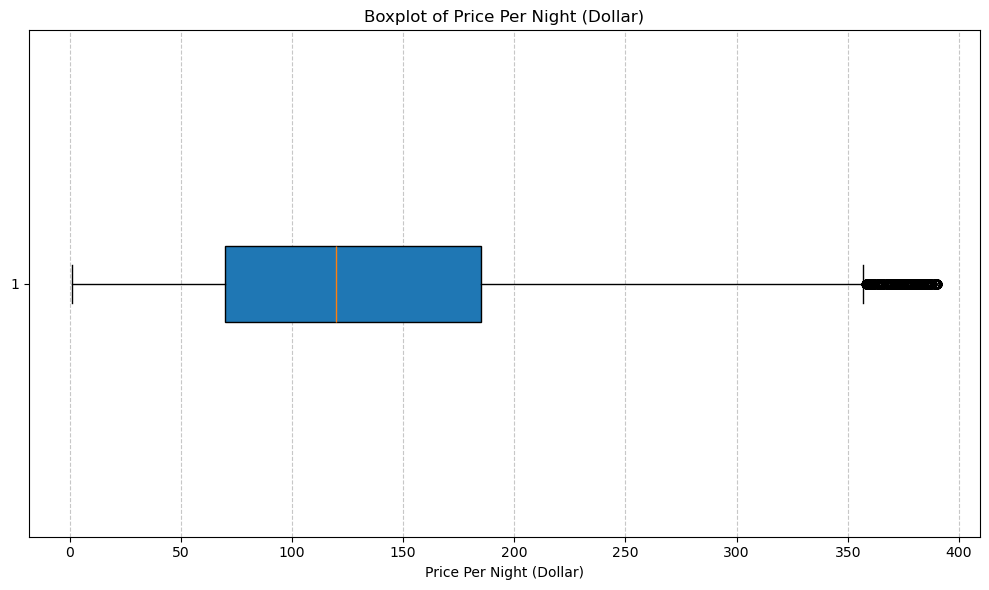

In [6]:

london_rows = df.shape[0]
print(f"Number of datapoints (rows) after filtering for 'london': {london_rows}")

# Remove outliers from 'price_per_night_dollar'
Q1 = df["price_per_night_dollar"].quantile(0.25)
Q3 = df["price_per_night_dollar"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["price_per_night_dollar"] >= lower_bound) & (df["price_per_night_dollar"] <= upper_bound)]

rows_after_outlier_removal = df.shape[0]
print(f"Number of datapoints (rows) after outlier removal: {rows_after_outlier_removal}")


# Calculate the average price
average_price = df["price_per_night_dollar"].mean()
print(f"The average price per night is: ${average_price:.2f}")

plt.figure(figsize=(10, 6))
plt.boxplot(df["price_per_night_dollar"], vert=False, patch_artist=True)
plt.title("Boxplot of Price Per Night (Dollar)")
plt.xlabel("Price Per Night (Dollar)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The Boxplot confirmed that the data is now distributed more uniformly, with only small outliers between the range of 1 to 400.


**New Point of Interest Column and Correlation**

We scraped a lot of different point of interest data points (around fifty), depicting the amount of specific points of interests (e.g., museums, metro). As the high feature amount was difficult to utitlize within the current pipeline, we summarized it in three different features.


Correlation between POI columns and target variable:
sum_poi_500m: 0.2545
sum_poi_1000m: 0.2874
sum_poi_5000m: 0.3198


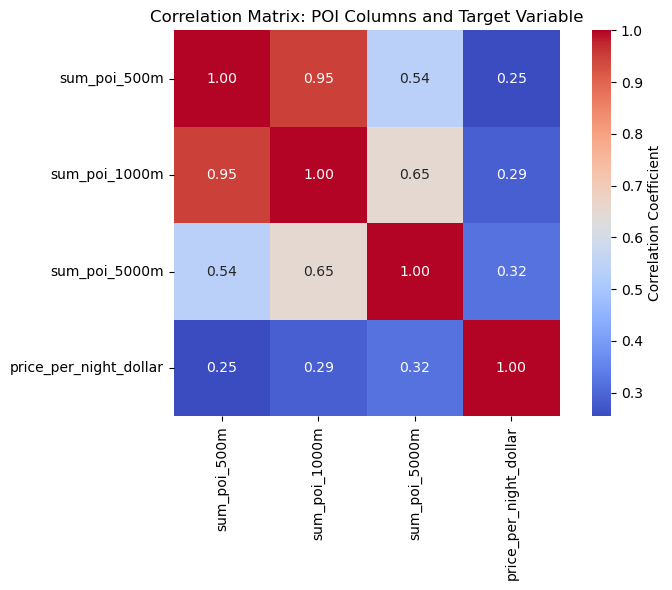

In [7]:


# Summarize the columns ending with _500m, _1000m, _5000m
poi_500m_cols = [col for col in df.columns if col.endswith('_500m')]
poi_1000m_cols = [col for col in df.columns if col.endswith('_1000m')]
poi_5000m_cols = [col for col in df.columns if col.endswith('_5000m')]

# Create new summarized columns
df['sum_poi_500m'] = df[poi_500m_cols].sum(axis=1)
df['sum_poi_1000m'] = df[poi_1000m_cols].sum(axis=1)
df['sum_poi_5000m'] = df[poi_5000m_cols].sum(axis=1)

# Drop the original POI columns
df = df.drop(columns=poi_500m_cols + poi_1000m_cols + poi_5000m_cols)


# Calculate the correlation between new POI columns and the target variable
poi_columns = ['sum_poi_500m', 'sum_poi_1000m', 'sum_poi_5000m']
correlations = {}

for col in poi_columns:
    correlations[col] = df[col].corr(df["price_per_night_dollar"])

print("Correlation between POI columns and target variable:")
for col, corr_value in correlations.items():
    print(f"{col}: {corr_value:.4f}")

# Calculate the correlation data
correlation_data = df[poi_columns + ["price_per_night_dollar"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_data,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix: POI Columns and Target Variable")
plt.tight_layout()
plt.show()


I primarily checked if the new data columns have a correlation to the target class (price per night in dollar). This should show if the further calculation of the metric makes sense at all. With correlations between 0.25 to 0.32, it showed a week correlation. Nevertheless, there could be usable information inside.

Start ML Pipeline

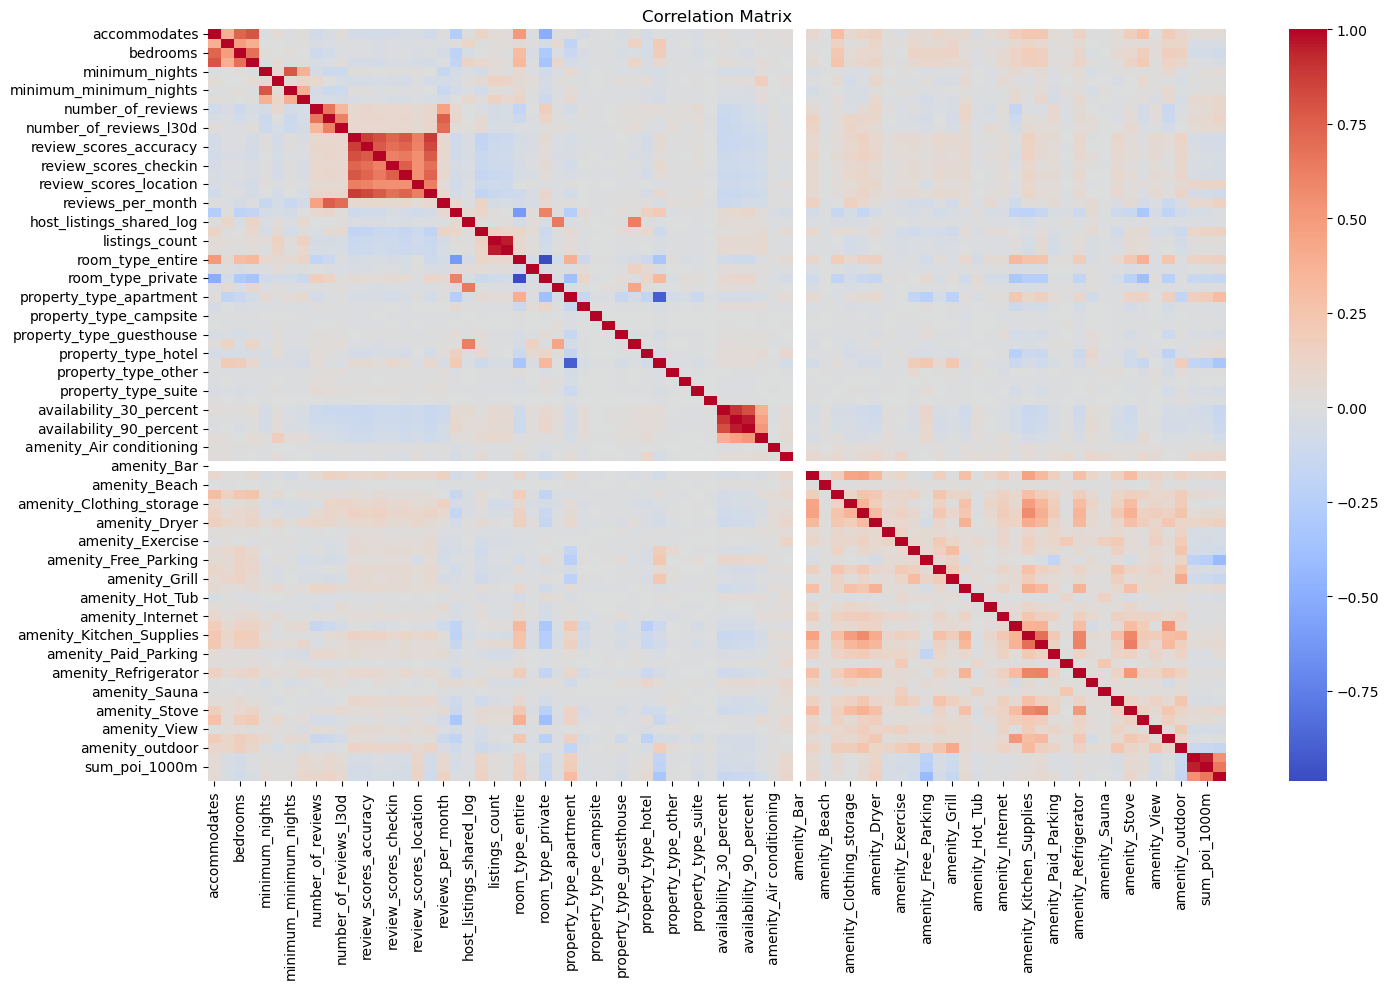

In [8]:
target_column = "price_per_night_dollar"
X = df.drop(columns=[target_column])
y = df[target_column]


# Calculate the correlation matrix for all features
#does not improve prediction
correlation_matrix = X.corr(method='pearson')


# Create and save the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In the current preprocessing step. I checked for high correlations between the training features. Pearson correlations above 0.9 will be eliminate because of potential redundant information. This should further allow to trimm the features and allow for a more targeted machine learning pipeline.

Train Test Split And Filtering

In [9]:
# Identify highly correlated features (threshold > 0.9)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
X = X.drop(columns=high_corr_features)

print(f"Features dropped due to high correlation: {high_corr_features}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


Features dropped due to high correlation: ['listings_count_total', 'availability_60_percent', 'availability_90_percent', 'sum_poi_1000m']


I decided to keep the training-test split of 90/10, as we have a high sample size of about 50.000 samples. In any case, it showed very small improvements of accuracy in this setting compared to the prior setting of 80/20.

Scaling

In [10]:
# Choose Scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


I tried two different scaling methods and also without it. No application changed the results. Because of this, I kept the MinMaxScaller as a basis.

Linear Regression

In [11]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

linear_model = LinearRegression()

# cross validation
cv_results_mae = cross_val_score(
    linear_model, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=kfold
)
cv_results_mse = cross_val_score(
    linear_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kfold
)
cv_results_r2 = cross_val_score(
    linear_model, X_train_scaled, y_train, scoring='r2', cv=kfold
)

# Calculate the average metrics from cross-validation
avg_mae_cv = -np.mean(cv_results_mae)
avg_mse_cv = -np.mean(cv_results_mse)
avg_r2_cv = np.mean(cv_results_r2)


linear_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_model.predict(X_test_scaled)


mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
r2_lr = r2_score(y_test, y_pred_lr)
explained_var_lr = explained_variance_score(y_test, y_pred_lr)


print("\nLinear Regression Cross-Validation Results (5-Fold):")
print(f"Average MAE (CV): {avg_mae_cv:.2f}")
print(f"Average MSE (CV): {avg_mse_cv:.2f}")
print(f"Average R-squared (CV): {avg_r2_cv:.2f}")

print("\nLinear Regression Test Set Results:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%")
print(f"R-squared (R2): {r2_lr:.2f}")
print(f"Explained Variance Score: {explained_var_lr:.2f}")


metrics = ['MSE (Test)', 'MAE (Test)', 'MAPE (Test)', 'R2 (Test)', 'Explained Variance (Test)',
           'MAE (CV)', 'MSE (CV)', 'R2 (CV)']
values = [mse_lr, mae_lr, mape_lr, r2_lr, explained_var_lr, avg_mae_cv, avg_mse_cv, avg_r2_cv]



Linear Regression Cross-Validation Results (5-Fold):
Average MAE (CV): 34.99
Average MSE (CV): 2304.40
Average R-squared (CV): 0.66

Linear Regression Test Set Results:
Mean Squared Error (MSE): 2251.07
Mean Absolute Error (MAE): 34.32
Mean Absolute Percentage Error (MAPE): 29.74%
R-squared (R2): 0.65
Explained Variance Score: 0.66


In the beginning, I wanted to try a fast and simple algorithm to model the airbnb prices. With a linear approach, I am also able to use the coefficients as a metric that shows the importance of individual features to the prediction. This interpretability will be later used in the feature importance analysis. I also employed a 5-fold cross-validation to get a better understanding of the ability of the algorithm to generalize. My primary target for comparison was the MAE (Mean Absolute Error) as it gives me a concrete undertanding of the usability of the linear approach. With an MAE of 34.33, it was already quite ok considering how simple the approach is.
As there are not hyperparameters for this method, I could not deploy a gridsearch approach.

Ridge Regression

In [12]:

ridge_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
}

ridge_model = Ridge()

# Grid Search
ridge_grid = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_params,
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

ridge_grid.fit(X_train_scaled, y_train)

print("\nBest parameters for Ridge Regression:", ridge_grid.best_params_)
print("Best score for Ridge Regression (MSE):", -ridge_grid.best_score_)

best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100
r2_ridge = r2_score(y_test, y_pred_ridge)
explained_var_ridge = explained_variance_score(y_test, y_pred_ridge)


print("\nRidge Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge:.2f}%")
print(f"R-squared (R2): {r2_ridge:.2f}")
print(f"Explained Variance Score: {explained_var_ridge:.2f}")


metrics = ['MSE', 'MAE', 'MAPE', 'R2', 'Explained Variance']
values = [mse_ridge, mae_ridge, mape_ridge, r2_ridge, explained_var_ridge]



Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best parameters for Ridge Regression: {'alpha': 0.1, 'solver': 'lsqr'}
Best score for Ridge Regression (MSE): 2301.165649162741

Ridge Regression Evaluation:
Mean Squared Error (MSE): 2251.30
Mean Absolute Error (MAE): 34.33
Mean Absolute Percentage Error (MAPE): 29.78%
R-squared (R2): 0.65
Explained Variance Score: 0.65


I chose the ridge regression as the second algorithm, as I wanted to see if the ability to model non-linear dynamics can increase the model. I also implemented a gridsearch approach to find optimal hyperparameter settings. Interestingly, the ridge regression algorithm did not improve the evaluation metrics. In general I tried to compare the performance of the ml algorithm on different metrics, to see if there are certain advantages. However, in this case, all metrics showed a similar picture to the linear approach.

XGBoost


Best Parameters for XGBoost: {'n_estimators': 1000, 'learning_rate': 0.01, 'max_depth': 10}
Best MAE from Cross-Validation: 28.18

XGBoost Regressor Evaluation:
Mean Squared Error (MSE): 1615.81
Mean Absolute Error (MAE): 27.80
Mean Absolute Percentage Error (MAPE): 22.27%
R-squared (R2): 0.75
Explained Variance Score: 0.75

XGBoost Results:
Mean Squared Error (MSE): 1604.42
Mean Absolute Error (MAE): 27.58
Mean Absolute Percentage Error (MAPE): 22.17%
R-squared (R2): 0.75
Explained Variance Score: 0.75


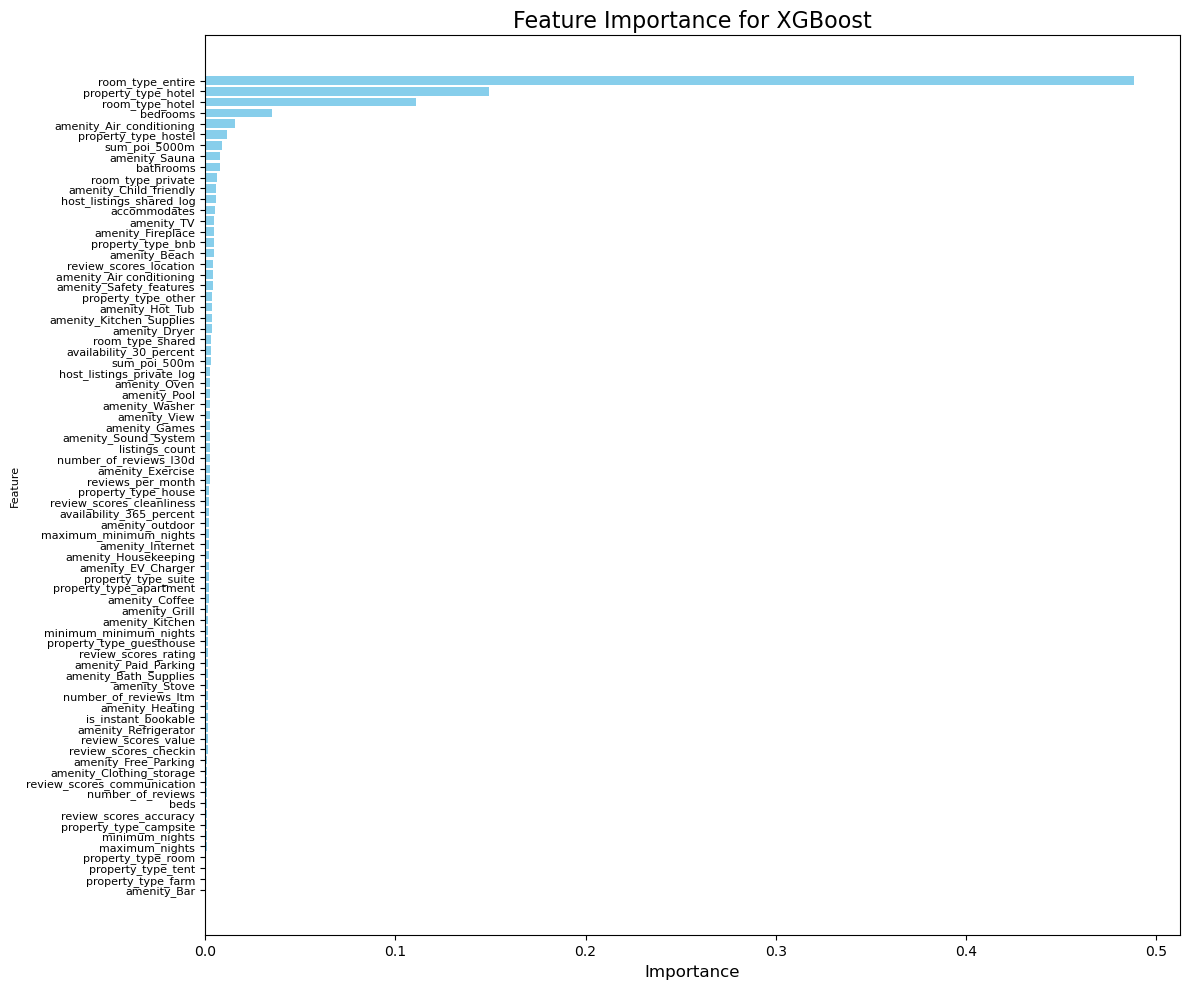

In [13]:

n_estimators_options = [100, 1000]
learning_rate_options = [0.01, 0.1]
max_depth_options = [3, 10]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

best_params = None
best_mae = float('inf')

# Custom GridSearch
for n_estimators in n_estimators_options:
    for learning_rate in learning_rate_options:
        for max_depth in max_depth_options:
            mae_scores = []

            #cross validation
            for train_idx, val_idx in kfold.split(X_train_scaled):
                X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
                y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]


                xgb_model = xgb.XGBRegressor(
                    n_estimators=n_estimators,
                    learning_rate=learning_rate,
                    max_depth=max_depth,
                    random_state=42,
                    verbosity=0
                )
                xgb_model.fit(X_train_cv, y_train_cv)


                y_pred_cv = xgb_model.predict(X_val_cv)
                mae_scores.append(mean_absolute_error(y_val_cv, y_pred_cv))

            # average MAE across folds
            avg_mae = np.mean(mae_scores)

            # check if current one is better
            if avg_mae < best_mae:
                best_mae = avg_mae
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

# Train the best XGBoost model on the entire training set
best_xgb_model = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluate the best model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
r2_xgb = r2_score(y_test, y_pred_xgb)
explained_var_xgb = explained_variance_score(y_test, y_pred_xgb)

# Print results
print("\nBest Parameters for XGBoost:", best_params)
print(f"Best MAE from Cross-Validation: {best_mae:.2f}")
print("\nXGBoost Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}%")
print(f"R-squared (R2): {r2_xgb:.2f}")
print(f"Explained Variance Score: {explained_var_xgb:.2f}")


###### Regular XGB for Comparison
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05, #0.1
    max_depth=10, #6
    random_state=42,
    verbosity=1
)

xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
explained_var_xgb = explained_variance_score(y_test, y_pred_xgb)

print("\nXGBoost Results:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb * 100:.2f}%")
print(f"R-squared (R2): {r2_xgb:.2f}")
print(f"Explained Variance Score: {explained_var_xgb:.2f}")

xgb_importance = xgb_model.feature_importances_

# Create a DataFrame for visualization
xgb_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 10))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='skyblue')
plt.title("Feature Importance for XGBoost", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=8)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()


plt.show()


As the third algorithn, I chose a tree-based boosting approach. As the xgboost algorithm doesnt support gridsearch, I had to code it manually. I chose three hyperparameters to tune, as the speed of the algorithm is not the fastest as well and therefore, limit processing time. However, the MAE could be improved to 27.58, which rendered this approach the best one of all the deployed algorithm. Also, I compared it to the standard implemention of XGBoost, which got that accuracy already out of the box. As this was the best algorithm, I deployed a feature importance directly. Hereby, I could see that the most important features were "room_type_entire", "property_type_hotel", "room_type_hotel". Our newly scraped and merged points of interest column was not included.

KNN

In [14]:

knn_params = {
    'n_neighbors': [3, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_model = KNeighborsRegressor()


knn_grid = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_params,
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

knn_grid.fit(X_train_scaled, y_train)

print("\nBest parameters for KNN Regressor:", knn_grid.best_params_)
print("Best score for KNN Regressor (MSE):", -knn_grid.best_score_)


best_knn_model = knn_grid.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn) * 100
r2_knn = r2_score(y_test, y_pred_knn)
explained_var_knn = explained_variance_score(y_test, y_pred_knn)


print("\nKNN Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_knn:.2f}%")
print(f"R-squared (R2): {r2_knn:.2f}")
print(f"Explained Variance Score: {explained_var_knn:.2f}")




Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters for KNN Regressor: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best score for KNN Regressor (MSE): 2630.780899916789

KNN Regressor Evaluation:
Mean Squared Error (MSE): 2566.18
Mean Absolute Error (MAE): 35.28
Mean Absolute Percentage Error (MAPE): 28.19%
R-squared (R2): 0.61
Explained Variance Score: 0.61


To have a variety of different algorithms, I also tested KNN. Here I had to limit the hyperparameter search space a bit as the algorithms performance is also not very fast. In the end, it was shown that the algorithm had the worst performance compared to the previous three approaches.

Feature Importance

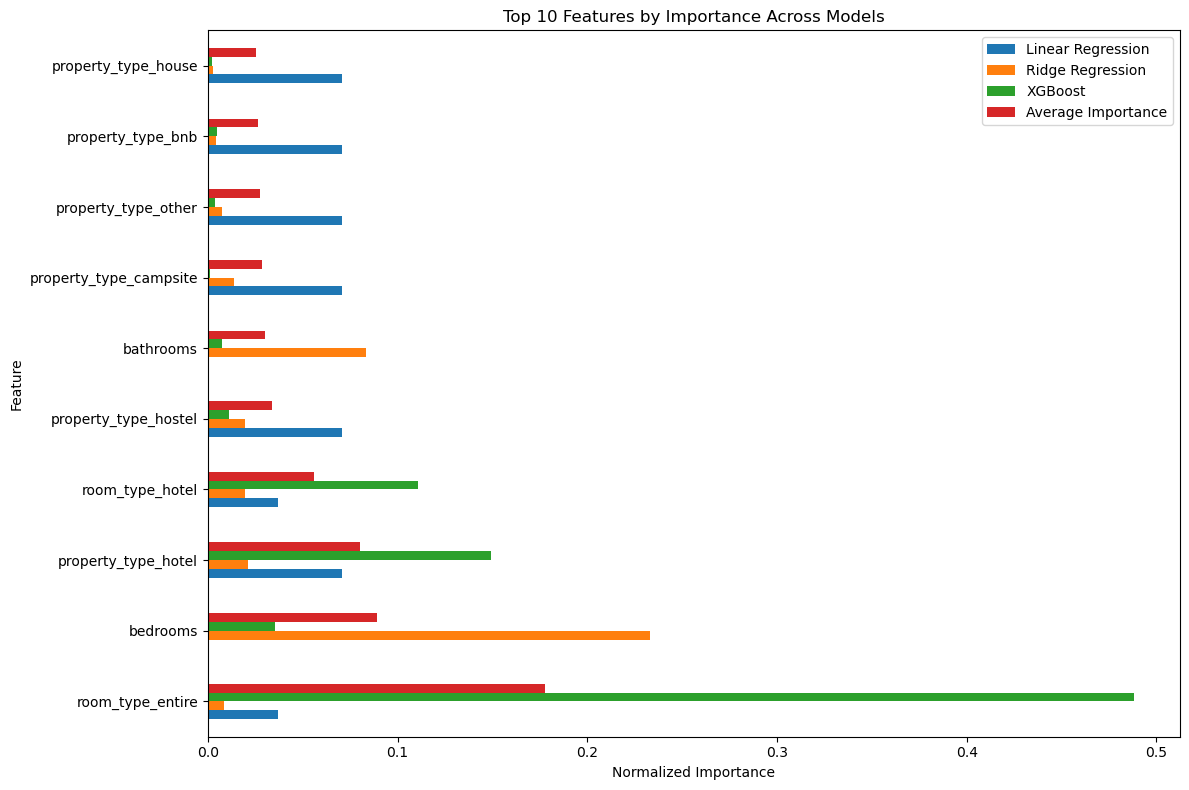

MAE Values Dictionary: {'Linear Regression': 34.32219045524522, 'Ridge Regression': 34.33480954028269, 'XGBoost': 27.58174474668786, 'KNN Regressor': 35.277630821859354}
MAE DataFrame:
                Model        MAE
0  Linear Regression  34.322190
1   Ridge Regression  34.334810
2            XGBoost  27.581745
3      KNN Regressor  35.277631


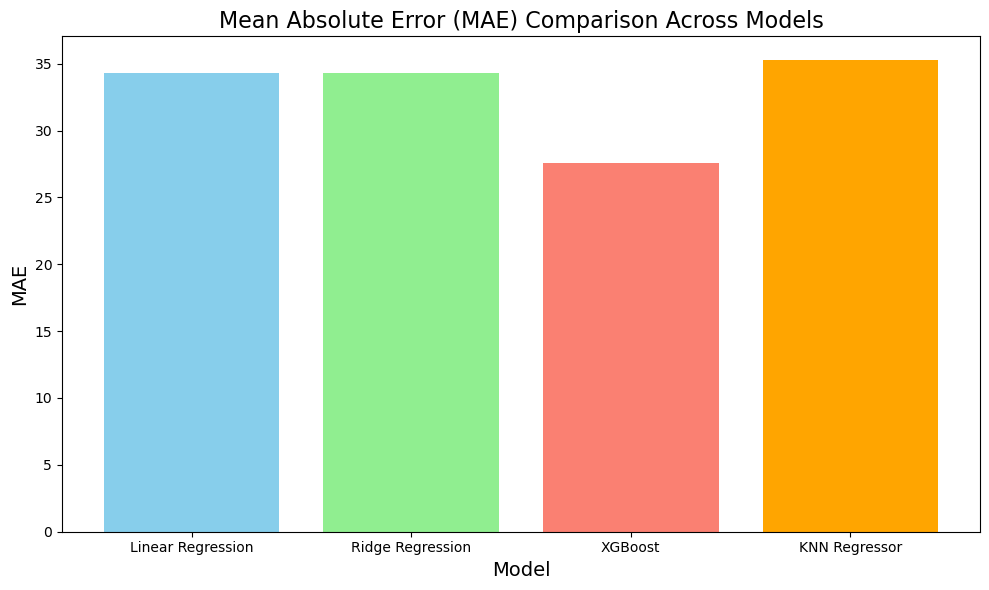

In [15]:
lr_importance = np.abs(linear_model.coef_)
lr_importance = lr_importance / lr_importance.sum()

ridge_importance = np.abs(best_ridge_model.coef_)
ridge_importance = ridge_importance / ridge_importance.sum()

xgb_importance = xgb_model.feature_importances_
xgb_importance = xgb_importance / xgb_importance.sum()


# Create a DataFrame for comparison
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression': lr_importance,
    'Ridge Regression': ridge_importance,
    'XGBoost': xgb_importance,
}).set_index('Feature')

# Get the top 10 features by average importance across models
importance_df['Average Importance'] = importance_df.mean(axis=1)
top_features = importance_df.sort_values(by='Average Importance', ascending=False).head(10)

top_features.plot(kind='barh', figsize=(12, 8), title="Top 10 Features by Importance Across Models")
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


########### Summary of Results ########

mae_values = {
    'Linear Regression': mae_lr,
    'Ridge Regression': mae_ridge,
    'XGBoost': mae_xgb,
    'KNN Regressor': mae_knn  # Ensure these are already calculated
}


print("MAE Values Dictionary:", mae_values)

mae_df = pd.DataFrame(list(mae_values.items()), columns=['Model', 'MAE'])
print("MAE DataFrame:\n", mae_df)


plt.figure(figsize=(10, 6))
if not mae_df.empty:
    plt.bar(mae_df['Model'], mae_df['MAE'], color=['skyblue', 'lightgreen', 'salmon', 'orange'])
    plt.title("Mean Absolute Error (MAE) Comparison Across Models", fontsize=16)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel("MAE", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")

One of the primary questions within the research question was, if the points of interests had an effect on the prediction. To explore this, I deployed the feature importance analysis. The importance in linear regression is determined by the absolute value of coefficients, in ridge regression by the penalized coefficients considering regularization, and in XGBoost by metrics like gain, frequency, or coverage across tree splits where the feature is used. As I already calculated the feature importance of the best algorithm (xgboost), I was interested how much the features have been used over all algorithms. For this, I calculated the averages and visualized it. This highlighted some other features, such as "room_type_entire" (which was not used much in the linear and ridge approach), "bedroom", and "property_type_hotel". Interestingly, ther was no feature that had a high importance for all algorithms. Also, non of our three point of interest columns have been within the most 10 important features according to this analysis.

SHAP Analysis

PermutationExplainer explainer: 4548it [01:36, 43.38it/s]                          
PermutationExplainer explainer: 4548it [01:20, 49.31it/s]                          
100%|===================| 4544/4547 [11:25<00:00]        

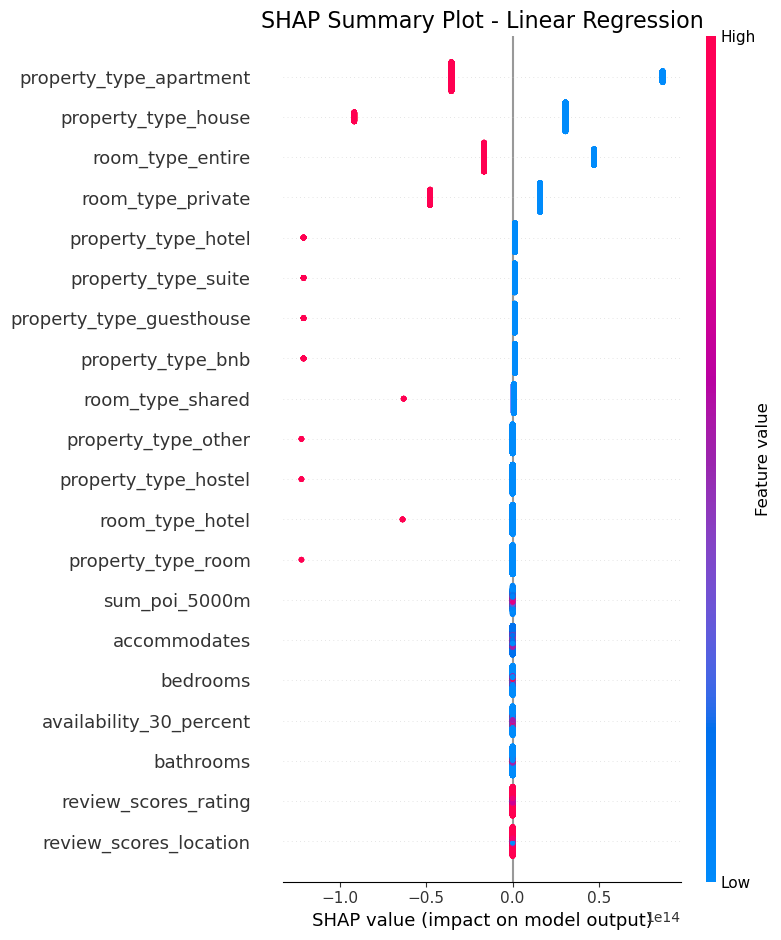

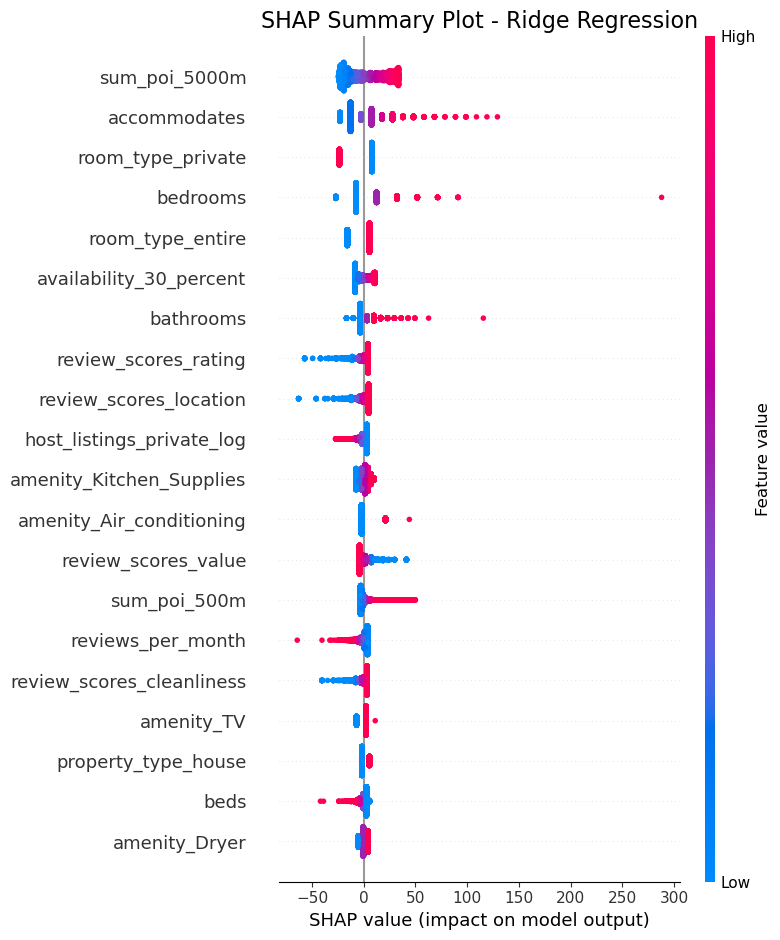

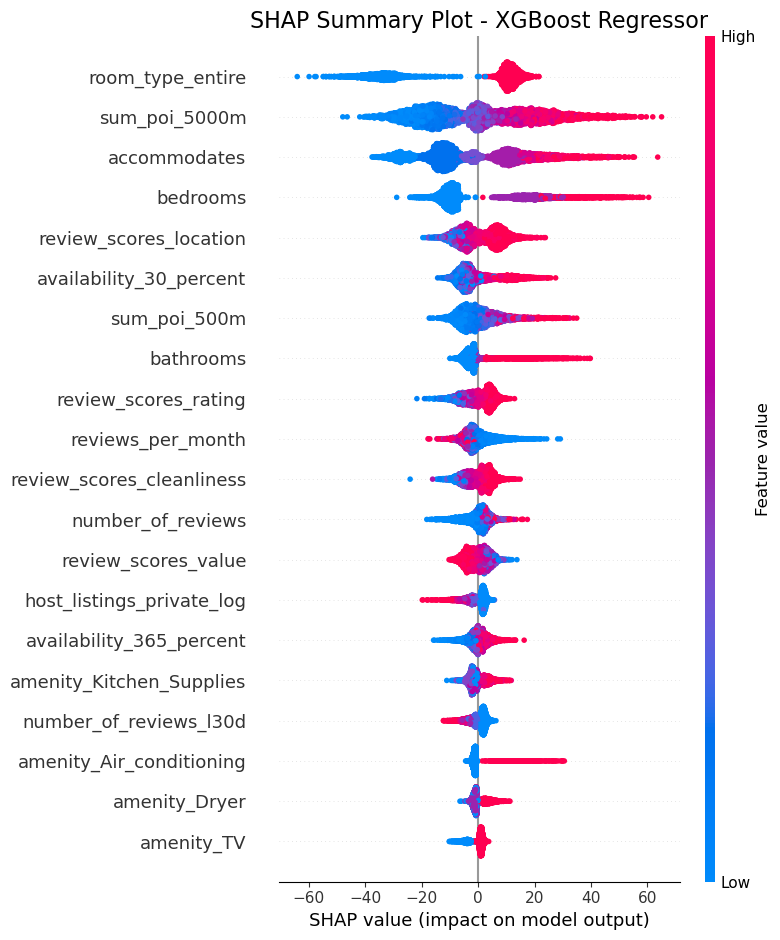

In [16]:
# Linear Regression
explainer_lr = shap.Explainer(linear_model.predict, X_train_scaled)
shap_values_lr = explainer_lr(X_test_scaled)

# Ridge Regression
explainer_ridge = shap.Explainer(best_ridge_model.predict, X_train_scaled)
shap_values_ridge = explainer_ridge(X_test_scaled)

# XGBoost
explainer_xgb = shap.Explainer(xgb_model, X_train_scaled)
shap_values_xgb = explainer_xgb(X_test_scaled)

# Visualizations with algorithm names in titles
# Linear Regression
shap.summary_plot(
    shap_values_lr,
    X_test_scaled,
    feature_names=X.columns,
    show=False
)
plt.title("SHAP Summary Plot - Linear Regression", fontsize=16)
plt.tight_layout()
plt.show()

# Ridge Regression
shap.summary_plot(
    shap_values_ridge,
    X_test_scaled,
    feature_names=X.columns,
    show=False
)
plt.title("SHAP Summary Plot - Ridge Regression", fontsize=16)
plt.tight_layout()
plt.show()

# XGBoost
shap.summary_plot(
    shap_values_xgb,
    X_test_scaled,
    feature_names=X.columns,
    show=False
)
plt.title("SHAP Summary Plot - XGBoost Regressor", fontsize=16)
plt.tight_layout()
plt.show()


Finally, I deployed a SHAP analysis to further investigate the importance of individual features on the prediction outcome. SHAP is a machine learning interpretability tool based on cooperative game theory. It assigns each feature an importance value (SHAP value) that quantifies its contribution to the model's predictions. Positive SHAP values push predictions higher, while negative values pull them lower, offering insights into the direction and magnitude of the feature.

Compared to the feature importance analysis, our generated point of interests (PoI) showed a high influence on the prediction outcome for all three regressors. Particularly the radius within 5000 meters and 500 meters were important features for prediction. Interestingly, this is in contrast to the feature importance analysis. This could be explained as some local predictions experienced a significant change based on the PoI values, while others did not. On the contrary, on the global (average) scale it might not influence the prediction much, which would explain low feature importance in the previous analysis.

**Conclusion RQ4**

In summary, we can say that the PoI feature had some effect on the prediction outcome, most probably for individual cases. We could see that only a limited amount of features were responsible for the performance of the algorithms, this included the room type, how many bedrooms, PoI within 5km, and how many bathrooms.

Overall, the Machine Learning pipeline could predict the prices of the Airbnbs with a relatively small MAE of 27.5. Considering that the pricing of the Airbnbs do not follow an overall deterministic approach (although Airbnb suggests prices to the apartment owners), this approach is suitable for an overall estimation of the price.

Several approaches were used to further increase the precision of the algorithms without success. This included:
*   Elimination of high skewness in data
*   Excessive Hyperparameter tuning
*   Eliminating features based on correlation
*   Feature Scaling (MinMax, Standard Scaling)
*   Selecting top 10 and top 20 features based on mutual information
*   Changing splits to 80/20


**What was newly learned in RQ4?**

For the first time I investigated how data skewenes can influence the prediction. Furthermore I learned different methods on how to eliminate high skeweness.
Another new and important part was the SHAP analysis. Altough I calculated SHAP values before, I used a different library this time and explored their visualizations a bit. These depiction of SHAP values was new to me.
Another thing I learned in this notebook was the creation of a custom gridsearch approach within XGBoost.
